## Project 2
## Part 1: House Prices Advanced Regression Techniques

##### Problem Statment:
This project is working to predict the price of houses depending on the features of each house. the data that deal with it is collected from Kaggle compittion websit which contains two datasets (train_data and test_data). 




### Contents:
- [Load Required Sklearnpackages](#Load-required-sklearnpackages)
- [Data Import and Explore](#Data-Import_explore)
- [Visulasition Data](#Visulasition_Data)
- [Data Cleaning](#Data-Cleaning)
- [Visulasition Data After Cleaning](#Visulasition_Data_After_cleaning)
- [Modeling With Different Stretagies](#Modeling_With_Different_Stretagies)
- [Results](#Results)



### Kaggle Link

https://www.kaggle.com/nohazamaan/notebook931ec3cf49



### Load Required Sklearnpackages

In [120]:
# upload all libraries that need in code
#basic libraries
import pandas as pd
import numpy as np
#libraryies for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
import math
from sklearn.linear_model import Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

#libraries for visluasition
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Data Import and Explore

##### load the datasets

In [121]:
#load train and test datasets 
train_data=pd.read_csv('./datasets/train.csv')
test_data=pd.read_csv('./datasets/test.csv')
sample_data=pd.read_csv('./datasets/sample_submission.csv')

##### Display the data

In [122]:
#show the head of train data
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [123]:
#show the head of test data
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

##### Exploring and Describing the data

In [124]:
#show the information of each feature in train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [125]:
test_data.info()#show the information of each feature in test data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [126]:
print('Shape of train data: ',train_data.shape)# display how many rows and columns in train data
print('Shape of test  data: ',test_data.shape)# display how many rows and columns in test data

Shape of train data:  (1460, 81)
Shape of test  data:  (1459, 80)


##### Summary Statistics.

In [127]:
train_data.describe()# given most impotant calculation of each feature in train data such as [count,mean,....ect]

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [93]:
test_data.describe()# given most impotant calculation of each feature in test data such as [count,mean,....ect]

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

### Visulasition Data

In [105]:
 train_data.corr()# show  the correlation between features in train data

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

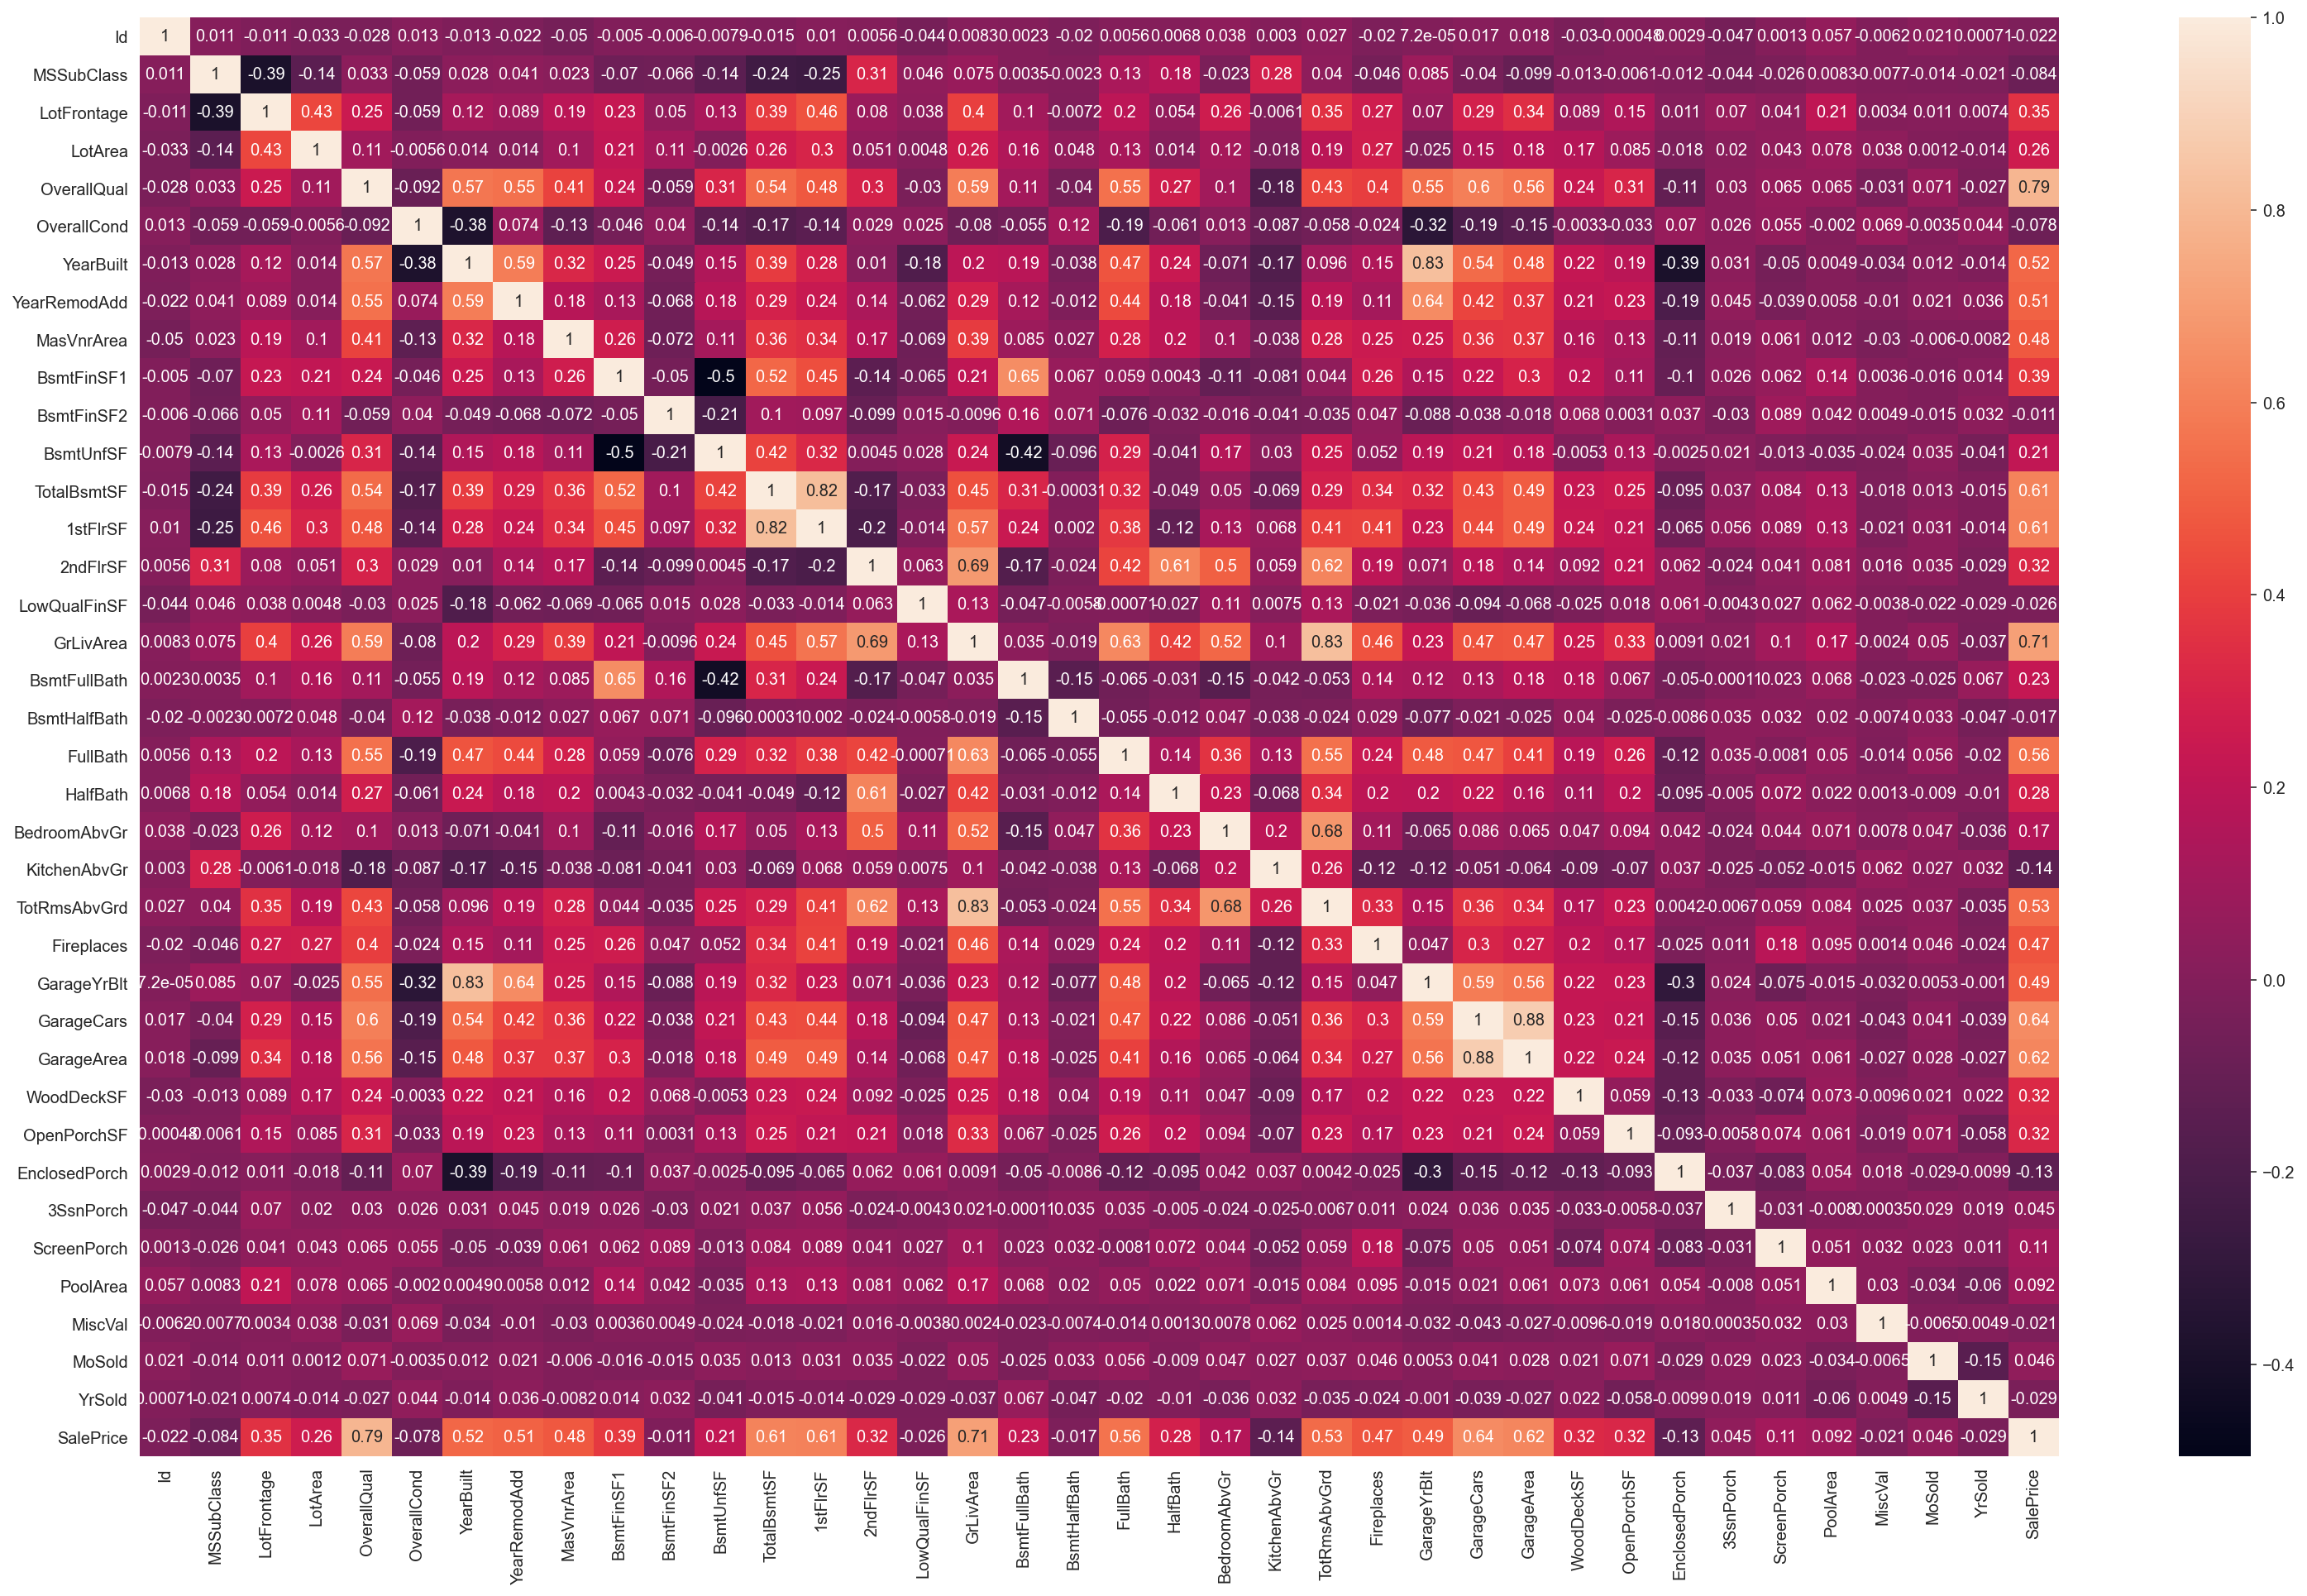

In [106]:
#do heatmap to show thes correlation visuallyin train data
plt.figure(figsize=(26,16))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

Text(0, 0.5, 'Freq')

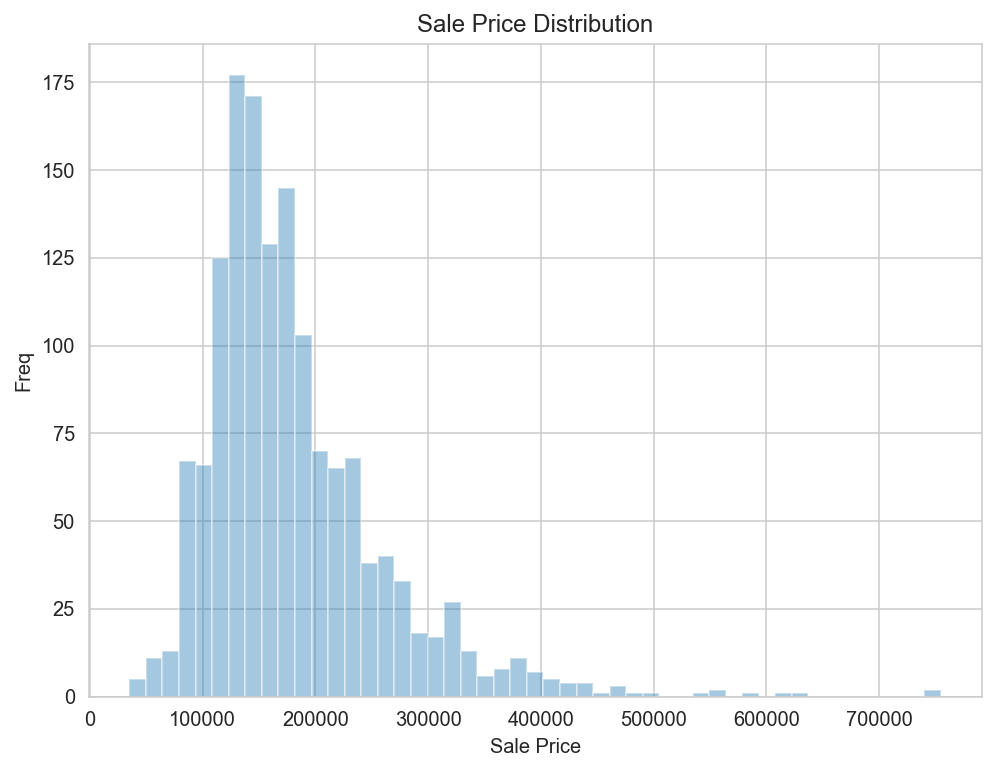

In [107]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(train_data['SalePrice'],kde=False,ax=ax)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Freq')

Text(0.5, 1.0, 'Electrical vs SalePrice')

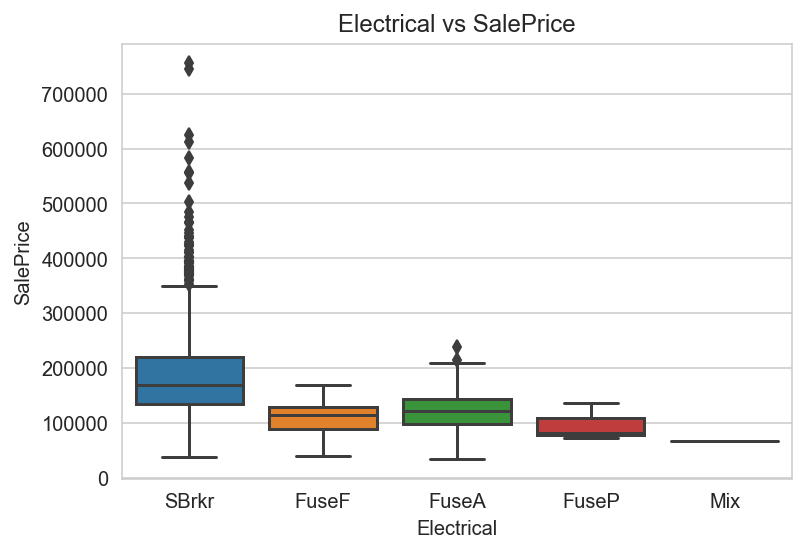

In [108]:
sns.boxplot(data=train_data,x='Electrical',y='SalePrice')
plt.title('Electrical vs SalePrice')

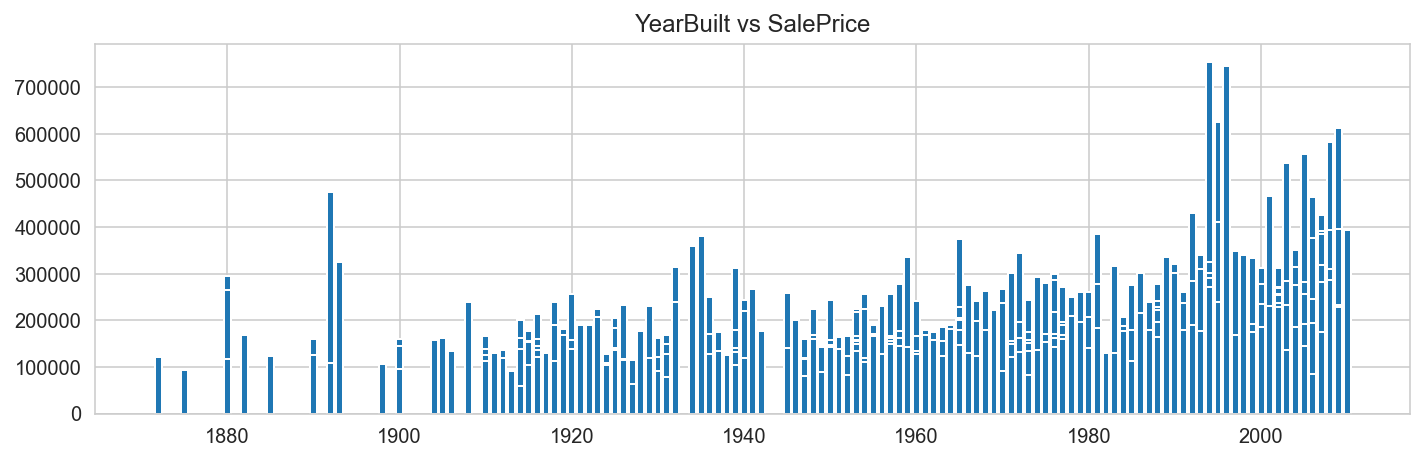

In [129]:
fig = plt.figure(figsize=(10,6))
plt.subplot(211)
plt.bar(train_data['YearBuilt'].values,train_data['SalePrice'])
plt.title('YearBuilt vs SalePrice')
plt.tight_layout()

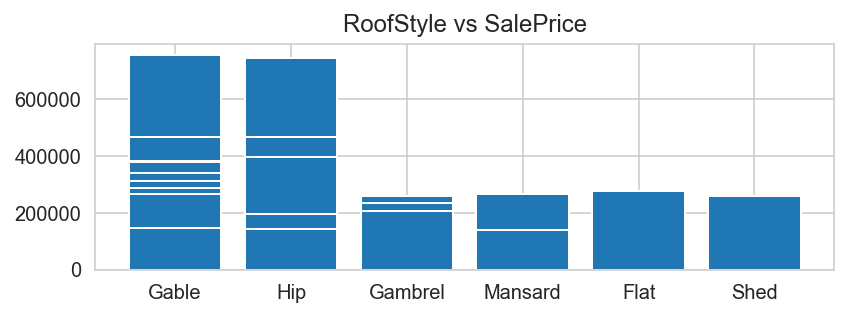

In [110]:
plt.subplot(212)
plt.bar(train_data['RoofStyle'].values,train_data['SalePrice'])
plt.title('RoofStyle vs SalePrice')
plt.tight_layout()

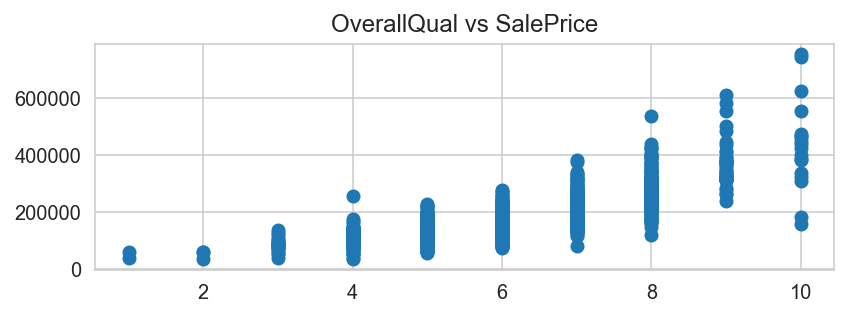

In [114]:
plt.subplot(212)
plt.scatter(train_data['OverallQual'].values,train_data['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.tight_layout()

### Cleaning Data
##### Looking for null value 

In [94]:
train_data.isnull().sum()# display all features with the number of null values they have in train data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [95]:
train_data.columns[train_data.isnull().any()]# display the name of columns that have null value in train data

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [96]:
percent_missing_train = train_data.isnull().sum() * 100 / len(train_data)# calculate the percentage of missing 
#value for each feature in train data
percent_missing_train.to_frame()# display them in dataframe

0
Id              0.000000
MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    17.739726
LotArea         0.000000
...                  ...
MoSold          0.000000
YrSold          0.000000
SaleType        0.000000
SaleCondition   0.000000
SalePrice       0.000000

[81 rows x 1 columns]

In [97]:
#how many columns have missing value in train data

len(train_data[train_data.columns[train_data.isnull().any()]].isnull().sum() * 100 / train_data.shape[0])


19

In [98]:
#now , we did the same in test data
test_data.isnull().sum()#show the number of missing value for each column

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [99]:
test_data.columns[test_data.isnull().any()]#name of columns that have missing value in test data

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [100]:
percent_missing_test = test_data.isnull().sum() * 100 / len(test_data)#percetage of missing value in each column in test data
percent_missing_test.to_frame()#display them in data frame

0
Id              0.000000
MSSubClass      0.000000
MSZoning        0.274160
LotFrontage    15.558602
LotArea         0.000000
...                  ...
MiscVal         0.000000
MoSold          0.000000
YrSold          0.000000
SaleType        0.068540
SaleCondition   0.000000

[80 rows x 1 columns]

In [101]:
#how many columns have missing value in test data
len(test_data[test_data.columns[test_data.isnull().any()]].isnull().sum() * 100 / test_data.shape[0])


33

##### Dealing with missing values

We applied various methods to deal with missing values


In [9]:
###### 1-Frist step: fill the missing value by mode in features that have only 2 or less missing value
#her in train data
train_data.MasVnrType.fillna(value=train_data['MasVnrType'].mode()[0], inplace=True)
train_data.Electrical.fillna(value=train_data['Electrical'].mode()[0], inplace=True)


In [10]:
#now in test data as well
test_data.MasVnrType.fillna(value=test_data['MasVnrType'].mode()[0], inplace=True)
test_data.Electrical.fillna(value=test_data['Electrical'].mode()[0], inplace=True)
test_data.MSZoning.fillna(value=test_data['MSZoning'].mode()[0], inplace=True)
test_data.Utilities.fillna(value=test_data['Utilities'].mode()[0], inplace=True)
test_data.Exterior1st.fillna(value=test_data['Exterior1st'].mode()[0], inplace=True)
test_data.Exterior2nd.fillna(value=test_data['Exterior2nd'].mode()[0], inplace=True)
#test_data.Exterior2nd.fillna(value=test_data['Exterior2nd'].mode()[0], inplace=True)
test_data.TotalBsmtSF.fillna(value=test_data['TotalBsmtSF'].mode()[0], inplace=True)
test_data.KitchenQual.fillna(value=test_data['KitchenQual'].mode()[0], inplace=True)
test_data.Functional.fillna(value=test_data['Functional'].mode()[0], inplace=True)
test_data.SaleType.fillna(value=test_data['SaleType'].mode()[0], inplace=True)

In [11]:
###### 2- Second step: we noticed that nan value in some features mean do not avaliable this featue in the house not miss value
## so, we replace the nan with '0' in nemoric features and 'no' in object features
#start in train data
train_data = train_data.replace({
    'LotFrontage': {np.nan: 0},
    'Alley': {np.nan: 'no_access'},
    'MasVnrArea':{np.nan: 0}, # it contains 8 missing value and we treated by using mode. The mode was 0 so,we fill it by 0
    'BsmtQual': {np.nan: 'no_basement'}, # nan that means no basement not no value
    'BsmtCond':{np.nan: 'no_basement'}, # nan that means no basement not no value
    'BsmtExposure':{np.nan: 'no_basement'}, # nan that means no basement not no value
     'BsmtFinType1':{np.nan: 'no_basement'}, # nan that means no basement not no value
    'BsmtFinType2':{np.nan: 'no_basement'}, # nan that means no basement not no value
    'FireplaceQu':{np.nan: 'no_Fire_place'}, # nan that means no fire place not no value
   'GarageType':{np.nan: 'no_Garage'}, # nan that means no Garage not no value
    'GarageYrBlt':{np.nan: 0} ,# nan that means no Garage not no value
     'GarageFinish':{np.nan: 'no_Garage'}, # nan that means no Garage not no value
     'GarageQual':{np.nan: 'no_Garage'}, # nan that means no Garage not no value
     'GarageCond':{np.nan: 'no_Garage'}, # nan that means no Garage not no value
     'PoolQC':{np.nan: 'no_Pool'}, # nan that means no Pool not no value
     'Fence':{np.nan: 'no_Fence'}, # nan that means no Fence not no value
     'MiscFeature':{np.nan: 'no_more_feature'},# nan that means no more_feature not no value
     'MSZoning':{'C (all)':'C'}
})

Id  MSSubClass MSZoning  LotFrontage  LotArea Street      Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  no_access      Reg   
1   2          20       RL         80.0     9600   Pave  no_access      Reg   
2   3          60       RL         68.0    11250   Pave  no_access      IR1   

  LandContour Utilities  ... PoolArea   PoolQC     Fence      MiscFeature  \
0         Lvl    AllPub  ...        0  no_Pool  no_Fence  no_more_feature   
1         Lvl    AllPub  ...        0  no_Pool  no_Fence  no_more_feature   
2         Lvl    AllPub  ...        0  no_Pool  no_Fence  no_more_feature   

  MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       0      2   2008        WD         Normal     208500  
1       0      5   2007        WD         Normal     181500  
2       0      9   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [12]:
#her we did the same in test data
test_data = test_data.replace({
    'LotFrontage': {np.nan: 0},
    'Alley': {np.nan: 'no_access'},
    'MasVnrArea':{np.nan: 0}, # it contains 8 missing value and we treated by using mode. The mode was 0 so,we fill it by 0
    'BsmtQual': {np.nan: 'no_basement'}, # nan that means no basement not no value
    'BsmtCond':{np.nan: 'no_basement'}, # nan that means no basement not no value
    'BsmtExposure':{np.nan: 'no_basement'}, # nan that means no basement not no value
     'BsmtFinType1':{np.nan: 'no_basement'}, # nan that means no basement not no value
    'BsmtFinType2':{np.nan: 'no_basement'}, # nan that means no basement not no value
    'FireplaceQu':{np.nan: 'no_Fire_place'}, # nan that means no fire place not no value
   'GarageType':{np.nan: 'no_Garage'}, # nan that means no Garage not no value
    'GarageYrBlt':{np.nan: 0} ,# nan that means no Garage not no value
     'GarageFinish':{np.nan: 'no_Garage'}, # nan that means no Garage not no value
     'GarageQual':{np.nan: 'no_Garage'}, # nan that means no Garage not no value
     'GarageCond':{np.nan: 'no_Garage'}, # nan that means no Garage not no value
     'PoolQC':{np.nan: 'no_Pool'}, # nan that means no Pool not no value
     'Fence':{np.nan: 'no_Fence'}, # nan that means no Fence not no value
     'MiscFeature':{np.nan: 'no_more_feature'}, # nan that means no more_feature not no value
     'BsmtFinSF1':{np.nan: 0},
    'BsmtFinSF2':{np.nan: 0},
    'BsmtUnfSF':{np.nan: 0},
    'BsmtFullBath':{np.nan: 0},
    'BsmtHalfBath':{np.nan: 0},
    'GarageCars':{np.nan:0},
    'GarageArea':{np.nan:0}

})


##### Using Dummies

In [13]:
# Also, we need to be all our features numbers so we use dummies to convert object features to [0,1]
# frist we select the columns will convert them .then use the function 
#strat with train data
one_hot_encoded_train_data = pd.get_dummies(train_data,columns=['Street','Alley','LotShape',
                                                           'LandContour','LotConfig',
                                                           'LandSlope','Condition1',
                                                           'BldgType','RoofStyle',
                                                           'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                                                            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                           'CentralAir','KitchenQual',
                                                           'Functional','FireplaceQu','GarageType', 
                                                           'GarageFinish','GarageCond',
                                                           'PavedDrive', 'Fence','SaleType',
                                                           'SaleCondition','MSSubClass','MSZoning','Neighborhood',
                                                                'Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd',
                                                             'Utilities','BsmtCond','Heating','HeatingQC','Electrical',
                                                              'GarageQual', 'PoolQC','MiscFeature'
                                                          ])

In [14]:
#appling the same method in test data
one_hot_encoded_test_data = pd.get_dummies(test_data,columns=['Street','Alley','LotShape',
                                                           'LandContour','LotConfig',
                                                           'LandSlope','Condition1',
                                                           'BldgType','RoofStyle',
                                                           'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                                                            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                           'CentralAir','KitchenQual',
                                                           'Functional','FireplaceQu','GarageType', 
                                                           'GarageFinish','GarageCond',
                                                           'PavedDrive', 'Fence','SaleType',
                                                           'SaleCondition','MSSubClass','MSZoning','Neighborhood',
                                                                'Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd',
                                                             'Utilities','BsmtCond','Heating','HeatingQC','Electrical',
                                                              'GarageQual', 'PoolQC','MiscFeature'
                                                          ])

In [15]:
#however, after that we noticed that the number of columns in the two datasets had changed so, now we need to drop the columns
# that make a different
#start comparing columns in train data
drop_colu_train=[]
for col1 in one_hot_encoded_train_data.columns:
    if col1 not in one_hot_encoded_test_data.columns:
        if col1 != 'SalePrice': 
            drop_colu_train.append(col1)
drop_colu # show the columns we need to drop 

In [16]:
#then compared test data columns
drop_colu_test=[]
for col1 in one_hot_encoded_test_data.columns:
    if col1 not in one_hot_encoded_train_data.columns:
            drop_colu_test.append(col1)
drop_colu_test # show the columns we need to drop

['MSSubClass_150', 'MSZoning_C (all)']

In [17]:
train_data=one_hot_encoded_train_data.drop(columns=drop_colu_train,axis=1)#drop columns please and save result in train data
train_data.head()# after droping unneed columns show me the result

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageQual_Po  \
0          2003       196.0         706           0  ...              0   
1          1976         0.0         978           0  ...              0   
2          2002       162.0         486           0  ...              0   
3          1970         0.0         216           0  ...              0   
4          2000       350.0         655           0  ...              0   

   GarageQual_TA  GarageQual_no_Garage  PoolQC_Ex  PoolQC_Gd  PoolQC_no_Pool  \
0              1                     0          0          0               1   
1              1                     0          0          0               1   
2              1                     0          0          0               1   
3              1                     0          0          0               1   
4              1                     0          0          0               1   

   MiscFeature_Gar2  MiscFeature_Othr  MiscFeature_Shed  \
0                 0                 0                 0   
1                 0                 0                 0   
2                 0                 0                 0   
3                 0                 0                 0   
4                 0                 0                 0   

   MiscFeature_no_more_feature  
0                            1  
1                            1  
2                            1  
3                            1  
4                            1  

[5 rows x 299 columns]

In [18]:
#do the same in test data
test_data=one_hot_encoded_test_data.drop(columns=drop_colu_test,axis=1)#drop columns please and save the result in test data
test_data.head()# show me the result

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1461         80.0    11622            5            6       1961   
1  1462         81.0    14267            6            6       1958   
2  1463         74.0    13830            5            5       1997   
3  1464         78.0     9978            6            6       1998   
4  1465         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageQual_Po  \
0          1961         0.0       468.0       144.0  ...              0   
1          1958       108.0       923.0         0.0  ...              0   
2          1998         0.0       791.0         0.0  ...              0   
3          1998        20.0       602.0         0.0  ...              0   
4          1992         0.0       263.0         0.0  ...              0   

   GarageQual_TA  GarageQual_no_Garage  PoolQC_Ex  PoolQC_Gd  PoolQC_no_Pool  \
0              1                     0          0          0               1   
1              1                     0          0          0               1   
2              1                     0          0          0               1   
3              1                     0          0          0               1   
4              1                     0          0          0               1   

   MiscFeature_Gar2  MiscFeature_Othr  MiscFeature_Shed  \
0                 0                 0                 0   
1                 1                 0                 0   
2                 0                 0                 0   
3                 0                 0                 0   
4                 0                 0                 0   

   MiscFeature_no_more_feature  
0                            1  
1                            0  
2                            1  
3                            1  
4                            1  

[5 rows x 298 columns]

In [19]:
train_data.shape,test_data.shape# now every thing OK the shape for both datasets are the same 
#train data has one more but this is the target do worry

((1460, 299), (1459, 298))

In [20]:
len(train_data[train_data.columns[train_data.isnull().any()]].isnull().sum() * 100 / train_data.shape[0])
#check null value gone in train data

0

In [21]:
#check null value gone in test data
len(test_data[test_data.columns[test_data.isnull().any()]].isnull().sum() * 100 / test_data.shape[0])

0

### Visulasition Data After Cleaning

Text(0.5, 1.0, 'Test data')

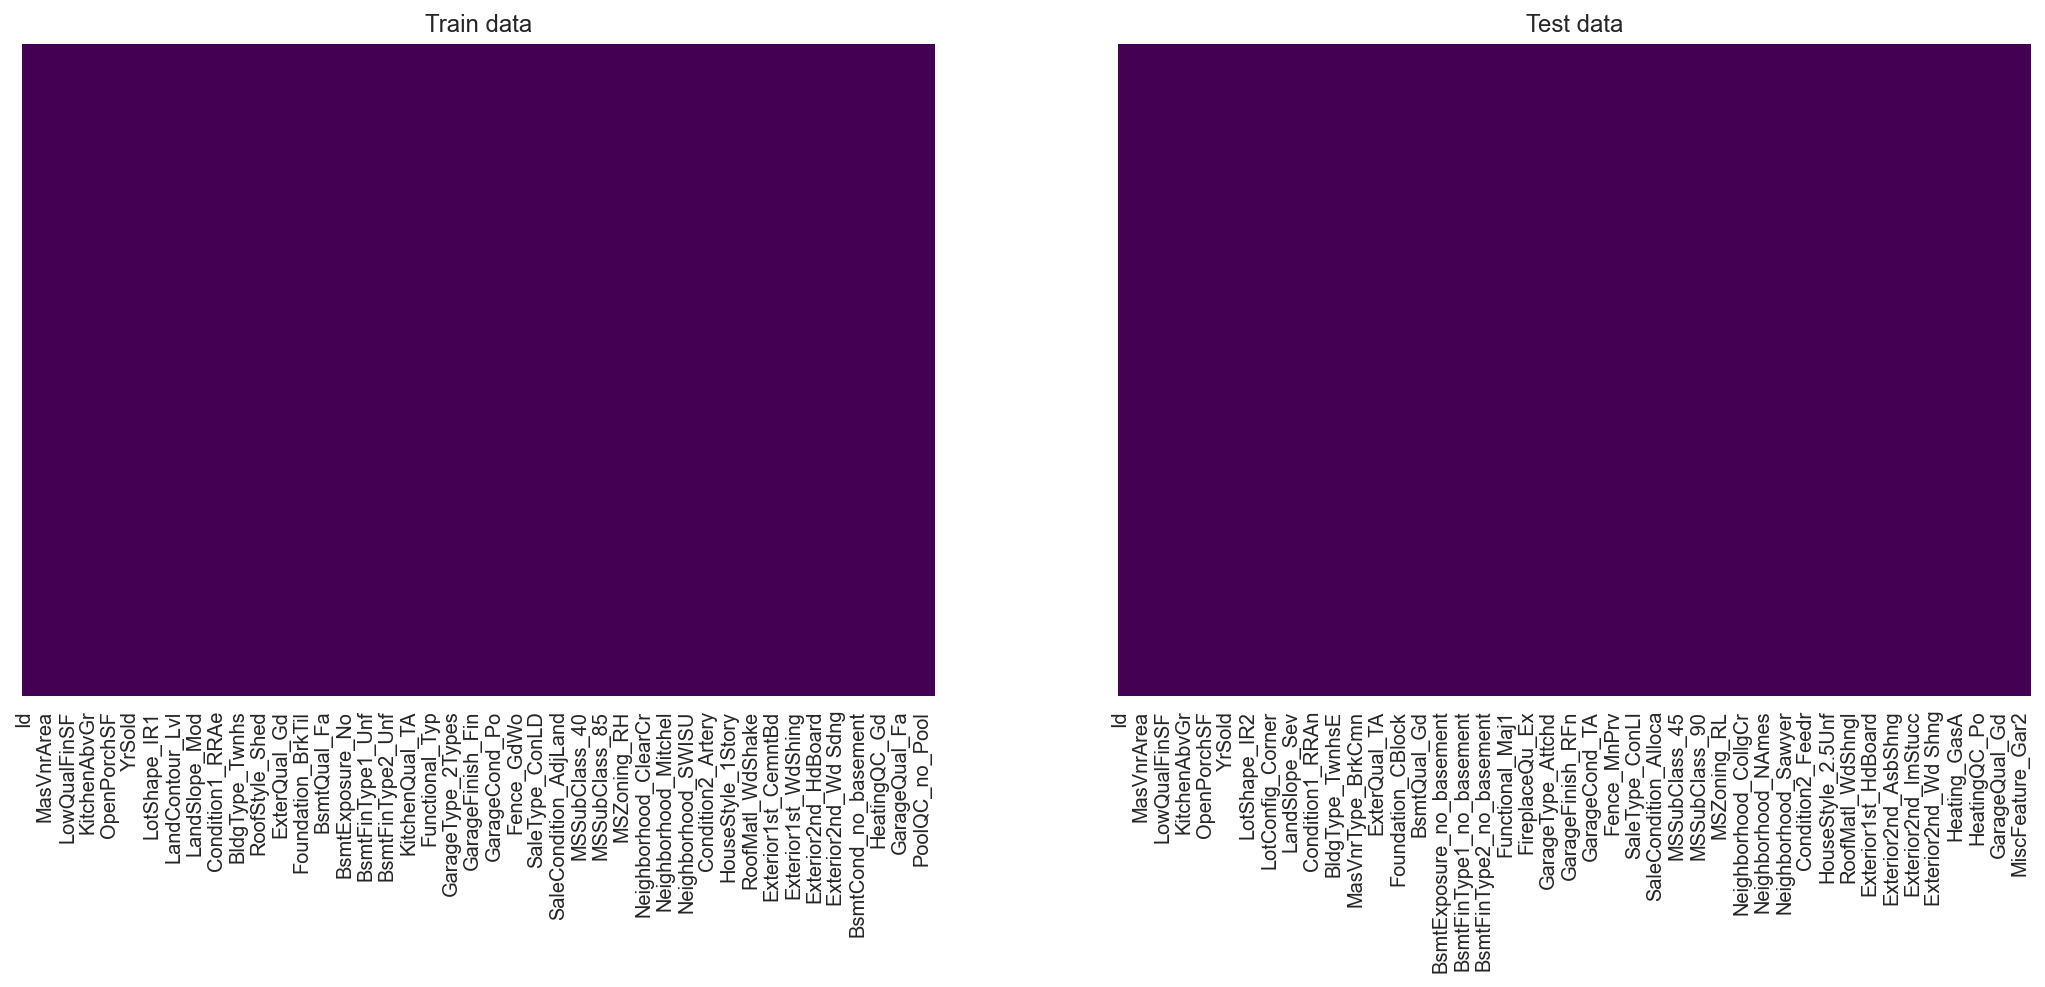

In [22]:
# To do double check we did heatmap to show if there is missing value in data or every data is clear
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
# train data
sns.heatmap(train_data.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')# for train data
# test data
sns.heatmap(test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data')#for test data

##### prepare features to visualize

In [24]:
continuous_columns= ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                    'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                    'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                     'ScreenPorch','PoolArea','YrSold','SalePrice']
categorical_columns=train_data.columns.drop(continuous_columns)
print("This is the features have continual values in both datasets:\n",continuous_columns)
print("This is the features have continual values in both datasets:\n",categorical_columns)
columns=continuous_columns.pop()

This is the features have continual values in both datasets:
 ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold', 'SalePrice']
This is the features have continual values in both datasets:
 Index(['Id', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       ...
       'GarageQual_Po', 'GarageQual_TA', 'GarageQual_no_Garage', 'PoolQC_Ex',
       'PoolQC_Gd', 'PoolQC_no_Pool', 'MiscFeature_Gar2', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_no_more_feature'],
      dtype='object', length=276)


###### visualize Train Data

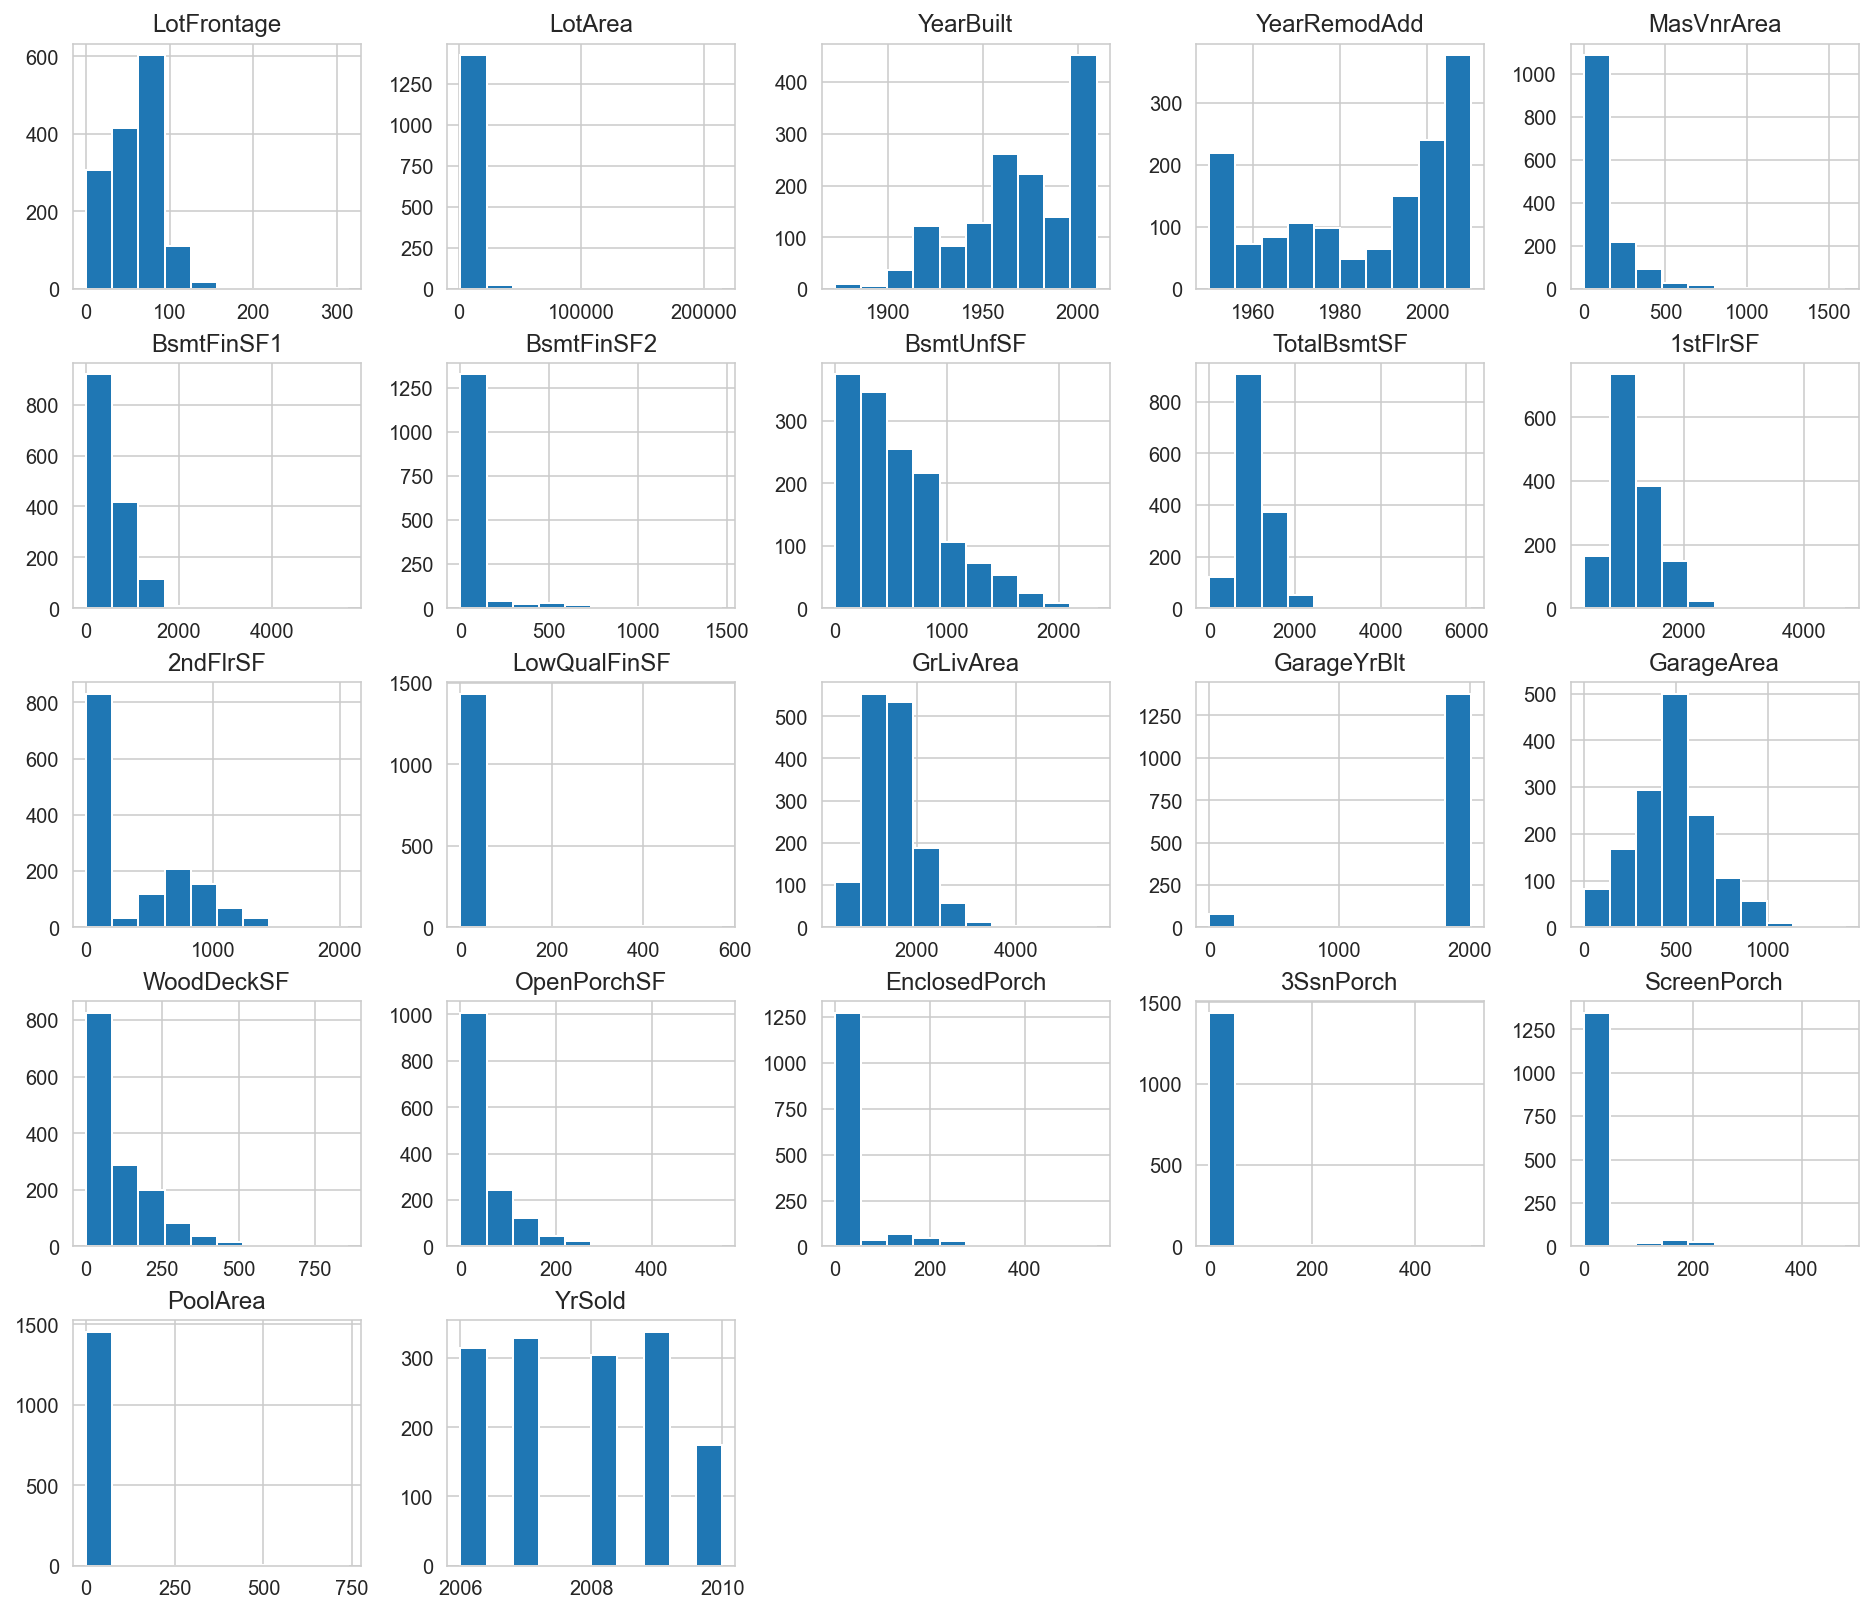

In [25]:
 train_data.hist(column=continuous_columns, figsize=(16,14));# did histogarme for each continual values in train data

we note the continuous variables on train house dataset is unnormall distrbution. most of them It is trend to positive skew.


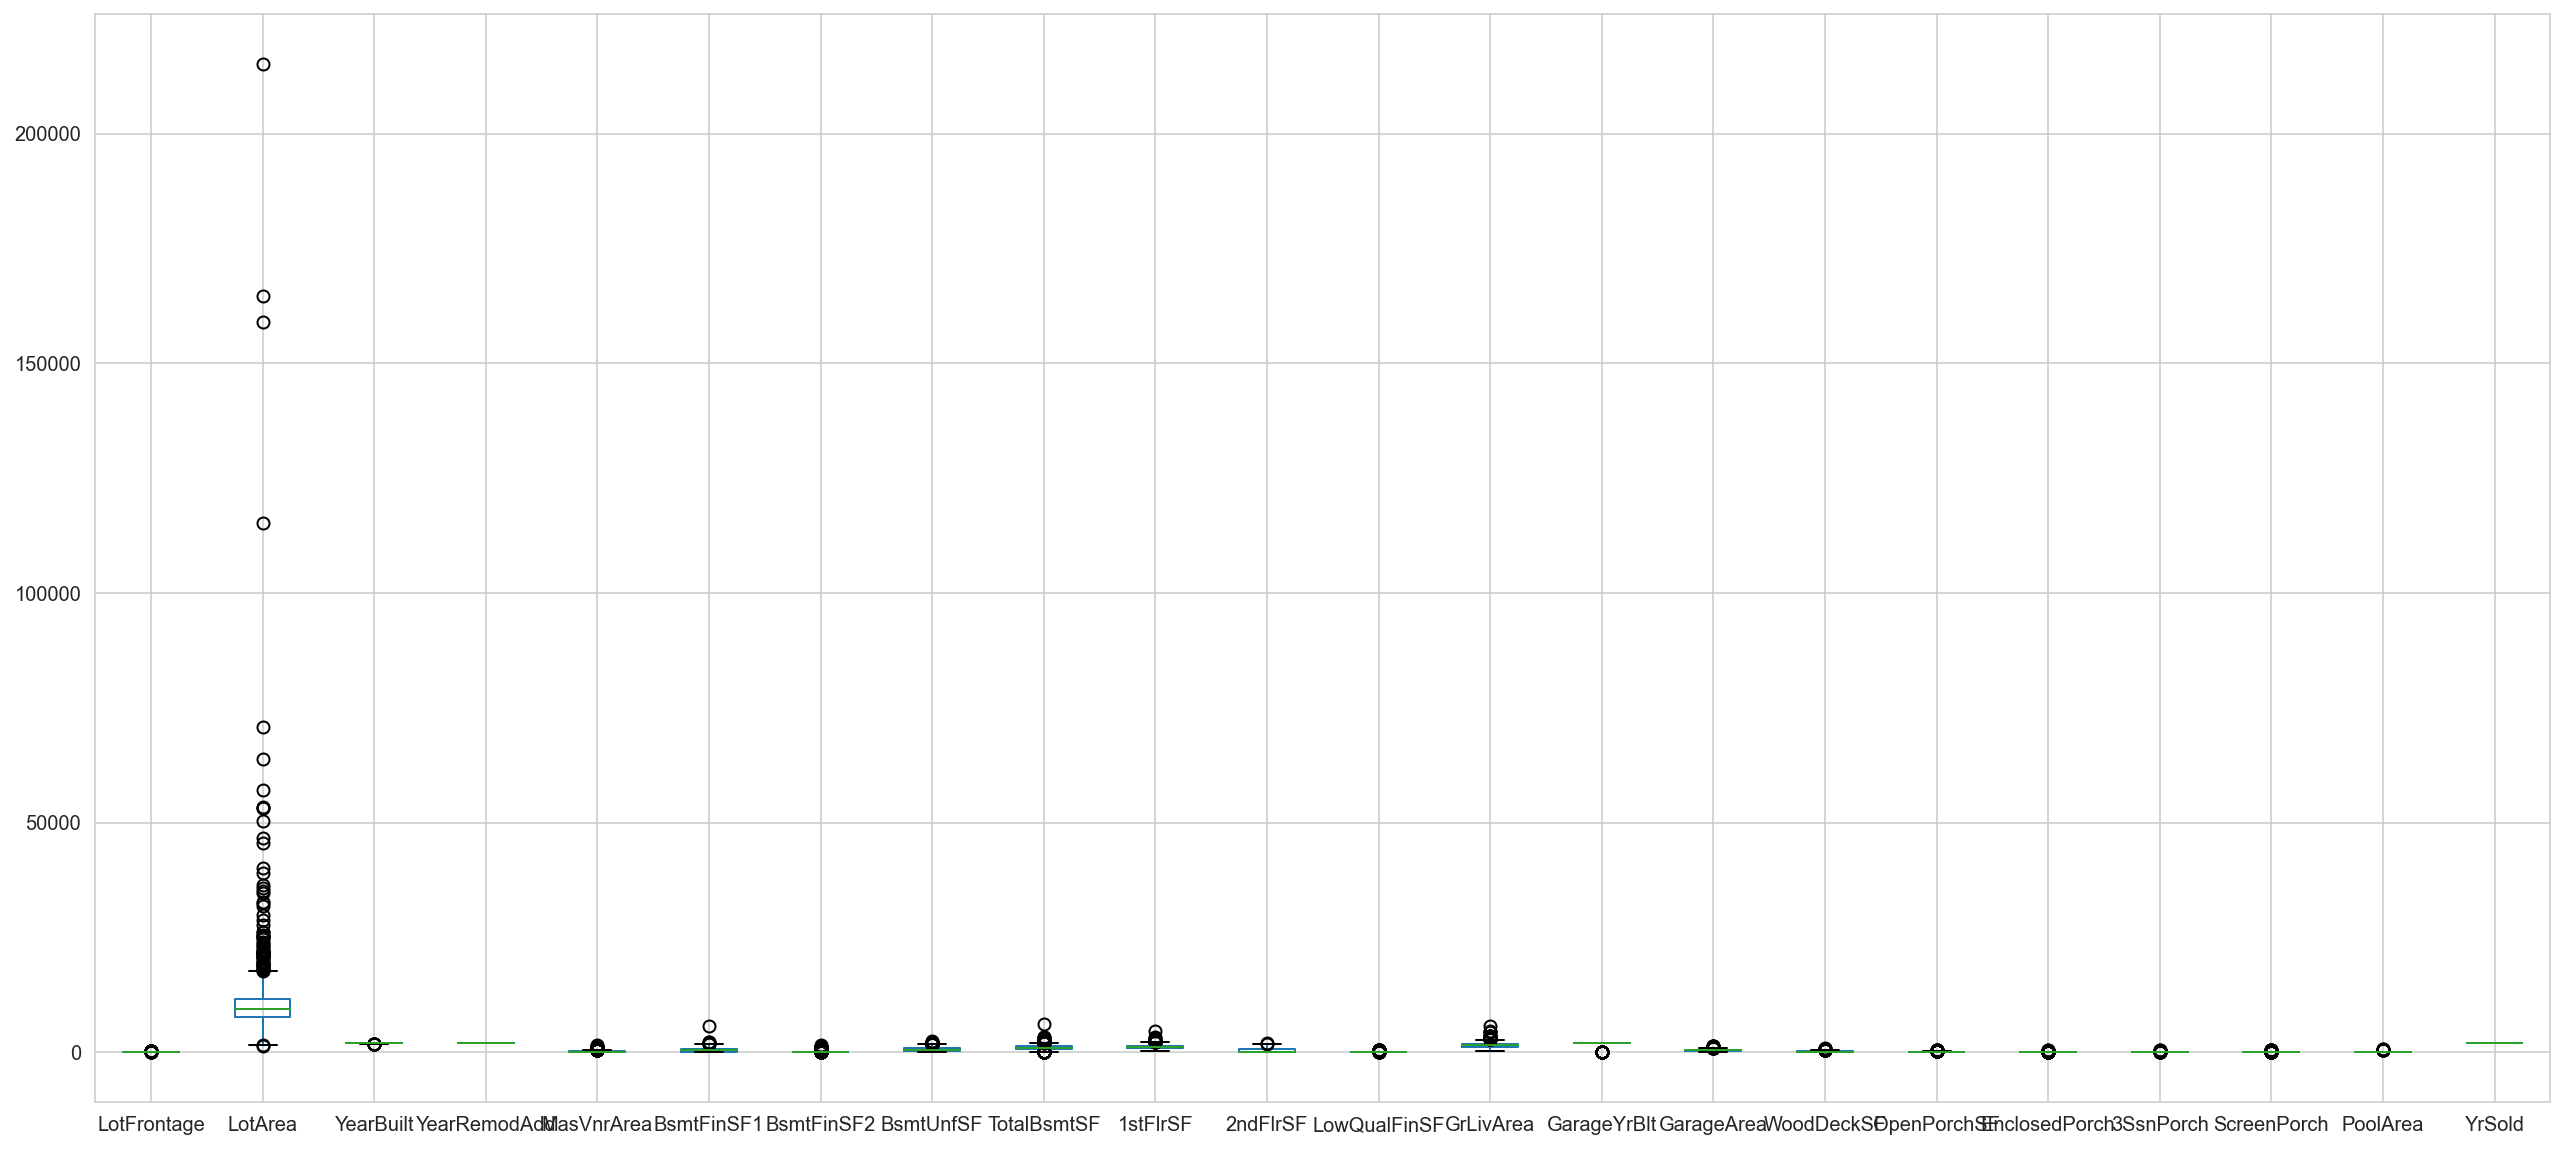

In [26]:
train_data.boxplot(column=continuous_columns, figsize=(22,10)); # did boxplot for continual columns in tarin data to display 
#the outlire

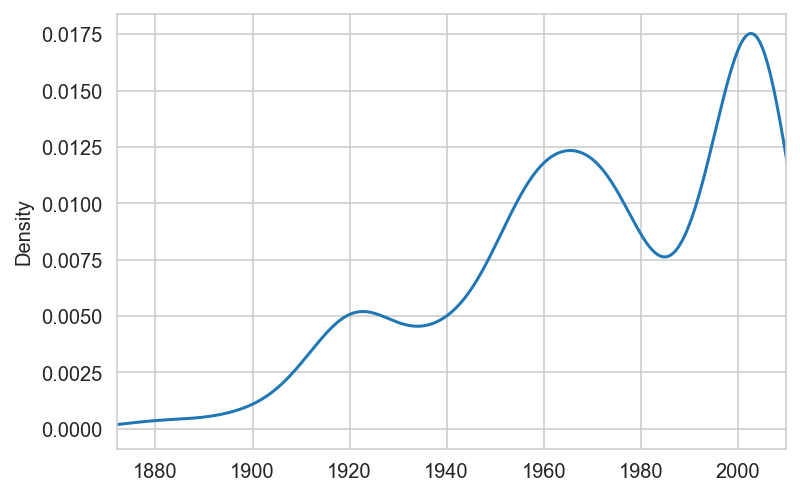

In [29]:
train_data.YearBuilt.plot(kind='density', xlim=(1872,2010));# plot line to show the density of housing during years 

In [33]:
print("We can see the low density was on:",train_data.YearBuilt.min(), "\nAnd the max was on:",
train_data.YearBuilt.max())

We can see the low density was on: 1872 
And the max was on: 2010


In [34]:
len(continuous_columns)

22


### Modeling With Different Stretagies


##### preparing for modeling

In [46]:
print(' baseline model on train data: ')##show the values of baseline

train_data.SalePrice.value_counts()/len(train_data.SalePrice)

 baseline model on train data: 


140000    0.013699
135000    0.011644
145000    0.009589
155000    0.009589
190000    0.008904
            ...   
84900     0.000685
424870    0.000685
415298    0.000685
62383     0.000685
34900     0.000685
Name: SalePrice, Length: 663, dtype: float64

------
### Frist Sterategy: using nemoric continous features:
We used with and without scaling and Grid_search faetures

In this strategy we selected the numoric features only and apply the different models as below

###### Preparing for first strategy
- Select only nemoric features

In [44]:
#we select the nemorics features for both datasets train and test
train_select_features=train_data[['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                    'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                    'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                     'ScreenPorch','PoolArea','YrSold']]

test_select_features=test_data[['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                    'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                    'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                     'ScreenPorch','PoolArea','YrSold']]

In [45]:
#we assign the nemoric features in X_train and X_test and identify the target to y_train which is [SalePrice]
X_train_data=train_select_features  
y_train_data=train_data['SalePrice']
X_test_data=test_select_features 


##### A-Start modeling by using Scale and Grid_search:
##### A1- Linear Regrestion:



In [49]:
#define the Pipe_line that contains StandardScaler and LinearRegression model
lr_pipe = Pipeline([
    ('sscaler2', StandardScaler()),
    ('lr', LinearRegression())
])

In [50]:
#assign the params for both scaling and model
lr_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'lr__fit_intercept':[True, False],
                 'lr__normalize':[True, False],
                 'lr__copy_X': [True, False]
                }

In [51]:
#Instantiate our GridSearchCV object.
lr_pipe_gridsearch = GridSearchCV(lr_pipe, # What is the model we want to fit?
                                 lr_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 #scoring='roc_auc',
                                   verbose=1)

In [52]:
# Fit the GridSearchCV object to the data.
lr_pipe_gridsearch.fit(X_train_data, y_train_data);

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [53]:
print('The best score' ,lr_pipe_gridsearch.best_score_)# print the best score that the Linearregression got
print('The score after GridSearch',lr_pipe_gridsearch.score(X_train_data, y_train_data))#print the score of X_train and y_train
print('the best parameters :',lr_pipe_gridsearch.best_params_)#print the best prameter of Gris_search

The best score 0.7280831650587606
The score after GridSearch 0.7491370803073306
the best parameters :
{'lr__copy_X': True, 'lr__fit_intercept': False, 'lr__normalize': True, 'sscaler2__with_mean': False, 'sscaler2__with_std': True}


In [54]:
#prediction for the model in trainpredect_lr on Train data
trainpredect_lr=lr_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in testpred_lr on Test data
testpred_lr= lr_pipe_gridsearch.predict(X_test_data)

In [55]:
print(np.sqrt(mean_squared_error(y_train_data, trainpredect_lr)))#print MSE of the model

39776.115929099025


In [56]:
print(metrics.mean_squared_error(y_train_data,trainpredect_lr))#print MMSE 

1582139398.4051254


In [57]:
# Get R-squared score
score =lr_pipe_gridsearch.score(X_train_data, y_train_data)
print ("The R-Squared is:",score)

The R-Squared is: 0.7491370803073306


In [58]:
# design dataframe that contains ID and test predection to send it to Kaggle to get the score 
lr_df=pd.DataFrame(testpred_lr,test_data['Id']).reset_index()
lr_df.rename(columns={0:'SalePrice'}, inplace=True)
lr_df.head()#show the head of dataframe

Id      SalePrice
0  1461  137090.461380
1  1462  160896.723114
2  1463  207291.664630
3  1464  208067.735865
4  1465  183390.896979

In [59]:
lr_df.to_csv('./datasets/House_lr_MMN.csv',index=False)#save the dataframe as CSV file to send it

This is the score that we got from Kaggle in Linear Resression model
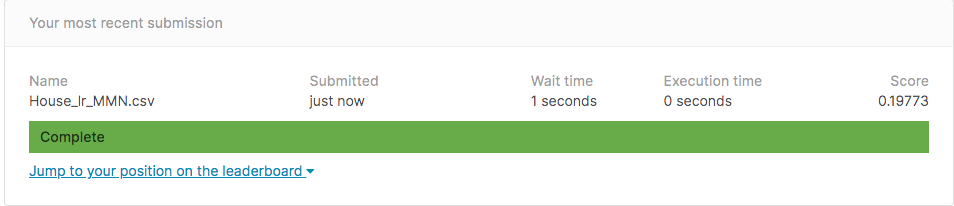

In [60]:
#This is cross validation and then take a mean of scores
s_Pip_lg = cross_val_score(lr_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Linear_Regression", "Train", s_Pip_lg.mean().round(3)))

Linear_Regression Train Score:	0.728 


##### we fit to linearRegression again becouse when use GridSearch we can't take the ('coef_') and ('intercept_') 


In [61]:
lr_=LinearRegression(copy_X=True, fit_intercept= True,
                     normalize= True)
lr_model=lr_.fit(X_train_data, y_train_data)

In [62]:
#prediction for the best model in lr_model_trainpredect on Train data
lr_model_trainpredect=lr_model.predict(X_train_data)
#prediction for the best model in lr_model_testpred_lr on Test data
lr_model_testpred_lr= lr_model.predict(X_test_data)

In [63]:
score =lr_model.score(X_train_data, y_train_data)
print ("The R-Squared is:",score)#bad

The R-Squared is: 0.7489648036014587


In [64]:
#print ('slope:',model.coef_) and (intercept)
print ('slope:',lr_model.coef_)
print ('intercept:',lr_model.intercept_)

slope: [ 4.79501618e+01  4.05518667e-01  4.72068110e+02  5.93434263e+02
  3.75102793e+01 -6.84653693e+14 -6.84653693e+14 -6.84653693e+14
  6.84653693e+14  8.24441996e+14  8.24441996e+14  8.24441996e+14
 -8.24441996e+14 -3.11516705e+00  5.37938211e+01  3.79192805e+01
  1.69411515e+01  3.92136627e+01  3.49601447e+01  9.21879020e+01
 -6.66760694e+01 -8.87629776e+02]
intercept: -308304.8206690283


#### A2-  Ridge Regression

In [65]:
# Build Ridge model 
# use PipeLine that contains tandardScaler and the model [Ridge]
ridge_pipe = Pipeline([
    ('sscaler2', StandardScaler()),
    ('ridge',Ridge())])

In [66]:
# define the parmater for both scaling and model
ridge_pipe_params = {'sscaler2__with_mean': [True, False], 
                     'sscaler2__with_std': [True, False],
                     'ridge__copy_X':[True, False],
                    'ridge__alpha':[0.1, 1.0, 10.0],
                    'ridge__fit_intercept': [True,False],
                    'ridge__normalize':[True,False],
                    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag','saga']
                }

In [67]:
#Instantiate our GridSearchCV object.
ridge_pipe_gridsearch = GridSearchCV(ridge_pipe, # What is the model we want to fit?
                                 ridge_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?                                      
                                verbose=1)

In [68]:
ridge_pipe_gridsearch.fit(X_train_data, y_train_data);# do fit for train data

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


In [69]:
print('The best score' ,ridge_pipe_gridsearch.best_score_)#print the best score
print('The score after GridSearch',ridge_pipe_gridsearch.score(X_train_data, y_train_data))#print the score of X_train data and y train data
print('the best parameters :',ridge_pipe_gridsearch.best_params_)# print best parameter that used on model

The best score 0.7297810008860702
The score after GridSearch 0.7482081130762577
the best parameters :
{'ridge__alpha': 0.1, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__normalize': True, 'ridge__solver': 'saga', 'sscaler2__with_mean': False, 'sscaler2__with_std': True}


In [70]:
#prediction for the best model in pred_ridge_best on Train data
trainpredect_ridge=ridge_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best_ridge on Test data
testpred_ridge= ridge_pipe_gridsearch.predict(X_test_data)

In [71]:
print(np.sqrt(mean_squared_error(y_train_data, trainpredect_ridge)))#print MSE score

39849.69508458276


In [72]:
print(metrics.mean_squared_error(y_train_data,trainpredect_ridge))# print MMSE score

1587998198.3342192


In [73]:
# Get R-squared score
print('The score after GridSearch',ridge_pipe_gridsearch.score(X_train_data, y_train_data))

The best score 0.7297810008860702
The score after GridSearch 0.7482081130762577
the best parameters :{'ridge__alpha': 0.1, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__normalize': True, 'ridge__solver': 'saga', 'sscaler2__with_mean': False, 'sscaler2__with_std': True}


In [74]:
ridge_df=pd.DataFrame(testpred_ridge,test_data['Id']).reset_index()
# design dataframe that contains ID and test predection to send it to Kaggle to get the score 

ridge_df.rename(columns={0:'SalePrice'}, inplace=True)
ridge_df.head()# show the head of dataframe

Id      SalePrice
0  1461  138688.430752
1  1462  164127.092724
2  1463  206217.399936
3  1464  207432.875074
4  1465  183494.513021

In [75]:
ridge_df.to_csv('./datasets/House_ridge1_MMN.csv',index=False)#save the data frame in CSV file to send it

This is the score that we got from Kaggle in Ridge Resression model

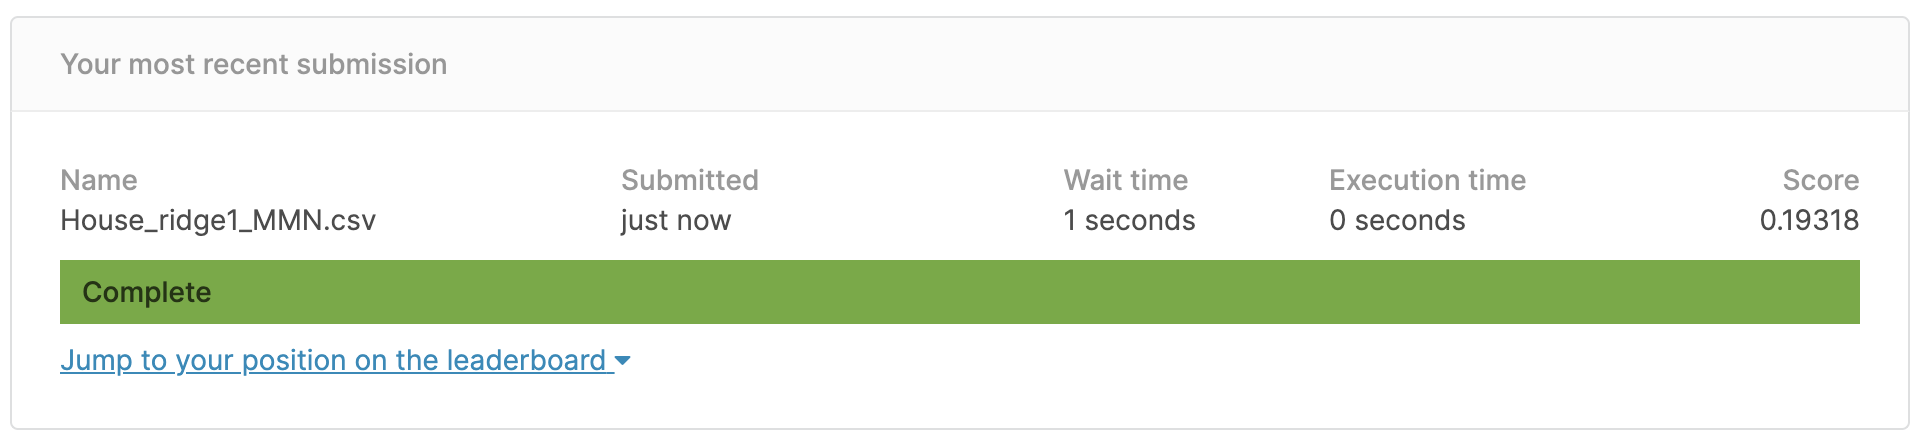

In [76]:
s_Pip_ridge = cross_val_score(ridge_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Ridge_regression", "Train", s_Pip_ridge.mean().round(3)))# do cross validation and show the mean of scors

Ridge Train Score:	0.716 


##### we fit toRidge_Regression again becouse when use GridSearch we can't take the ('coef_') and ('intercept_') 


In [77]:
ridge_=Ridge(alpha= 0.1,
            copy_X= True,
            fit_intercept= True,
            normalize= True,
            solver='sparse_cg')
ridge_model=lr_.fit(X_train_data, y_train_data)

In [78]:
#prediction for the best model in pred_ridge_best on Train data
ridge_model_trainpredect=ridge_model.predict(X_train_data)
#prediction for the best model in pred__best_ridge on Test data
ridge_model_testpred= ridge_model.predict(X_test_data)

In [79]:
score =ridge_model.score(X_train_data, y_train_data)
print ("The R-Squared is:",score)#bad

The R-Squared is: 0.7489648036014587


In [80]:
#print ('slope:',model.coef_) and (intercept)
print ('slope:',ridge_model.coef_)
print ('intercept:',ridge_model.intercept_)

slope: [ 4.79501618e+01  4.05518667e-01  4.72068110e+02  5.93434263e+02
  3.75102793e+01 -6.84653693e+14 -6.84653693e+14 -6.84653693e+14
  6.84653693e+14  8.24441996e+14  8.24441996e+14  8.24441996e+14
 -8.24441996e+14 -3.11516705e+00  5.37938211e+01  3.79192805e+01
  1.69411515e+01  3.92136627e+01  3.49601447e+01  9.21879020e+01
 -6.66760694e+01 -8.87629776e+02]
intercept: -308304.8206690283


#### A3- Lasso Regression

In [81]:
# Build Lasso regression model 
#define the Pipeline that contains scaling and model [Lasso]
lasso_pipe = Pipeline([
    ('sscaler2', StandardScaler()),
    ('lasso', Lasso())])

In [82]:
#define the parmater for both scale and model
lasso_pipe_params = {'sscaler2__with_mean': [True, False], 
                     'sscaler2__with_std': [True, False],
                     'lasso__copy_X':[True, False],
                    'lasso__alpha':[0.1, 1.0, 10.0],
                    'lasso__fit_intercept': [True,False],
                    'lasso__normalize':[True,False],
                     'lasso__positive':[True,False],
                     'lasso__precompute':[True,False],
                     'lasso__selection':['cyclic','random']
                    }

In [83]:
#Instantiate our GridSearchCV object.
lasso_pipe_gridsearch = GridSearchCV(lasso_pipe, # What is the model we want to fit?
                                 lasso_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?                                      
                                verbose=1)

In [84]:
lasso_pipe_gridsearch.fit(X_train_data, y_train_data)# fit X_train data and y_train data

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0],
                         'lasso__copy_X': [True, False],
                         'lasso__fit_intercept': [True, False],
                         'lasso__normalize': [True, False],
                         'lasso__positive': [True, False],
                         'lasso__precompute': [True, False],
                         'lasso__selection': ['cyclic', 'random'],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [85]:
print('The best score' ,lasso_pipe_gridsearch.best_score_)# git the best score
print('The score after GridSearch',lasso_pipe_gridsearch.score(X_train_data, y_train_data))# git the score of X,y train data
print(f'the best parameters :{lasso_pipe_gridsearch.best_params_}')# show the best parameter that used on modeling

The best score 0.7284958178481394
The score after GridSearch 0.7487569709586969
the best parameters :{'lasso__alpha': 10.0, 'lasso__copy_X': True, 'lasso__fit_intercept': True, 'lasso__normalize': True, 'lasso__positive': False, 'lasso__precompute': True, 'lasso__selection': 'random', 'sscaler2__with_mean': True, 'sscaler2__with_std': True}


In [86]:
#prediction for the best model in pred_lasso_best on Train data
trainpredect_lasso=lasso_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best_lasso on Test data
testpred_lasso= lasso_pipe_gridsearch.predict(X_test_data)

In [87]:
print(np.sqrt(mean_squared_error(y_train_data, trainpredect_lasso)))# print MSE score

39806.23905503097


In [88]:
print(metrics.mean_squared_error(y_train_data,trainpredect_lasso))#print MMSE score

1584536667.706273


In [89]:
# create dataframe that contain ID and testPrediction to send it to kaggle
lasso_df=pd.DataFrame(testpred_lasso,test_data['Id']).reset_index()
lasso_df.rename(columns={0:'SalePrice'}, inplace=True)
lasso_df.head()# show the head of data frame

Id      SalePrice
0  1461  136973.051287
1  1462  161689.558399
2  1463  207685.969406
3  1464  208117.362647
4  1465  183907.824063

In [90]:
lasso_df.to_csv('./datasets/House_lasso_MMN.csv',index=False)#save the dataframe in CSV file to be ready to send

This is the score that we got from Kaggle in Lasso Resression model
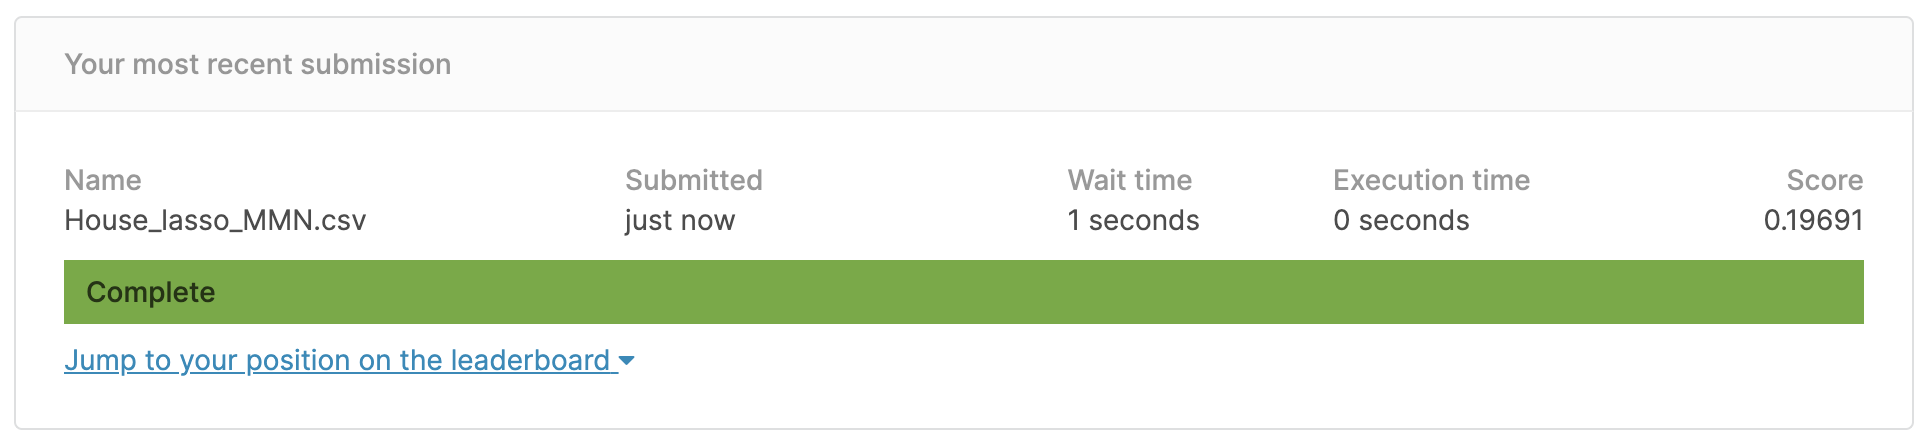

In [91]:
s_Pip_lasso = cross_val_score(lasso_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("lasso", "Train", s_Pip_lasso.mean().round(3)))# do cross validation and show the mean of score

Ridge Train Score:	0.728 


#### A4-  Random Forest


In [226]:
# define the PipeLine that contains  Scale and model [Random_forest_Regressor]
RF_pipe = Pipeline([
    ('sscaler2', StandardScaler()),
    ('RF', RandomForestRegressor())
])

In [227]:
# Define dictionary of hyperparametersfor both scale and model

RF_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'RF__n_estimators': [10, 50, 100, 150, 200],
                 'RF__max_features':[5,10,15,20],
                 'RF__max_depth': [1, 2, 3, 4, 5, 8],
                 'RF__criterion':['mse', 'mae']
                  }


In [228]:
# Instantiate our GridSearchCV object.
RF_pipe_gridsearch = GridSearchCV(RF_pipe, # What is the model we want to fit?
                                 RF_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 #scoring='roc_auc',
                                   verbose=1)

In [229]:
RF_pipe_gridsearch.fit(X_train_data, y_train_data)# do the fit for X,y train data

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('RF', RandomForestRegressor())]),
             param_grid={'RF__criterion': ['mse', 'mae'],
                         'RF__max_depth': [1, 2, 3, 4, 5, 8],
                         'RF__max_features': [5, 10, 15, 20],
                         'RF__n_estimators': [10, 50, 100, 150, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [230]:
print('The best score' ,RF_pipe_gridsearch.best_score_)# show the best score
print('The score after GridSearch',RF_pipe_gridsearch.score(X_train_data, y_train_data))# show the score of X,y train data
print(f'the best parameters :{RF_pipe_gridsearch.best_params_}')# show the best parameter that used on model

The best score 0.8304204966761318
The score after GridSearch 0.9394015579261126
the best parameters :{'RF__criterion': 'mae', 'RF__max_depth': 8, 'RF__max_features': 20, 'RF__n_estimators': 50, 'sscaler2__with_mean': False, 'sscaler2__with_std': True}


In [231]:
#prediction for the best model in pred_rf_best on Train data
trainpredect_rf=RF_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred__best_rf on Test data
testpred_rf= RF_pipe_gridsearch.predict(X_test_data)

In [232]:
print(np.sqrt(mean_squared_error(y_train_data, trainpredect_rf)))#print MSE for RF

19549.46451342195


In [233]:
print(metrics.mean_squared_error(y_train_data,trainpredect_rf))#print MMSE for RF

382181562.7615441


In [234]:
# create the dataframe the contain ID and testpred_rf to send it to kaggle
RForest_df=pd.DataFrame(testpred_rf,test_data['Id']).reset_index()
RForest_df.rename(columns={0:'SalePrice'}, inplace=True)
RForest_df.head()# show the head of dataframe

Id  SalePrice
0  1461  124207.54
1  1462  158404.00
2  1463  187830.50
3  1464  180691.36
4  1465  185279.94

In [235]:
RForest_df.to_csv('./datasets/House_RForest_MMN.csv',index=False)# save the dataframe as CSV to be ready to send

This is the score that we got from Kaggle in Random Forest Resression model

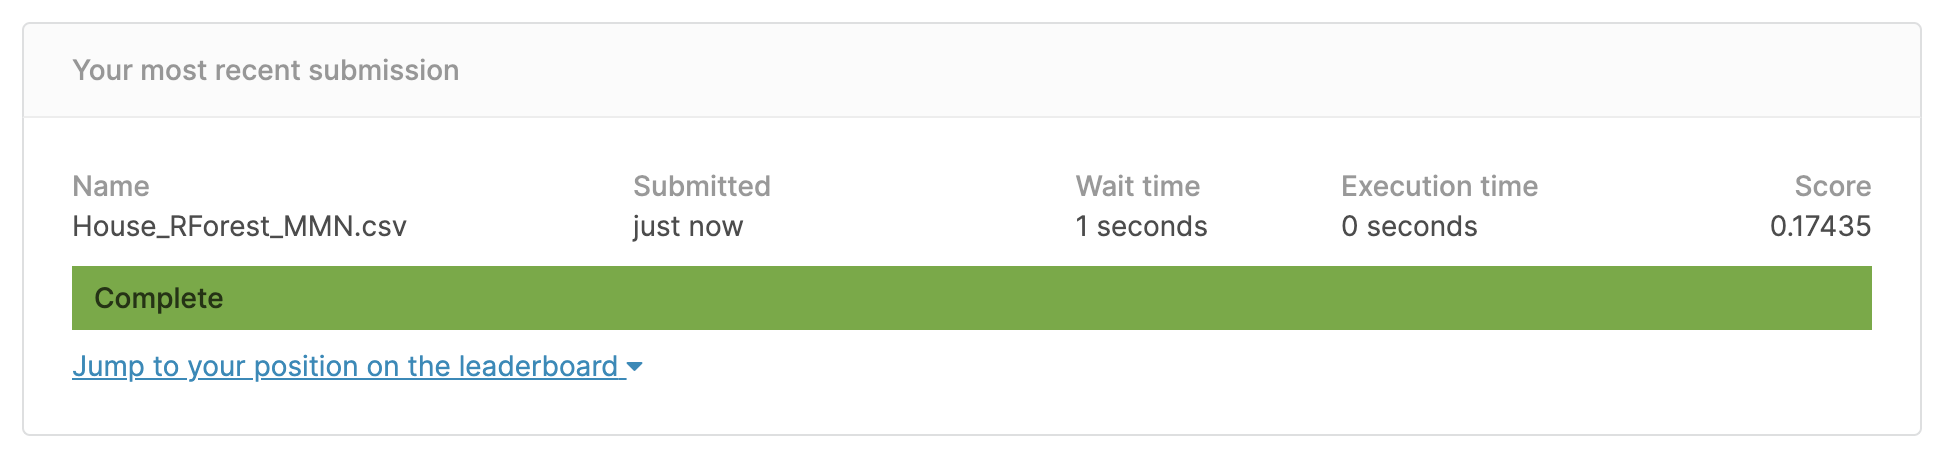

In [ ]:
s_Pip_RF = cross_val_score(RF_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1) #do cross validation and show the mean of score
print("{} {} Score:\t{:0.3} ".format("RandomForest", "Train", s_Pip_RF.mean().round(3)))

In [131]:
print("RandomForest Train Score: 0.817")

RandomForest Train Score: 0.817


#### A5- Knn Regressor


In [96]:
# identify the PipeLine that contains scale and model[KNeighborsRegressor]
knn1_pipe = Pipeline([
    ('sscaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

In [97]:
# define the parameter for both sclae and model
knn_pipe_params = {'sscaler__with_mean': [True, False], 
                     'sscaler__with_std': [True, False],
                     'knn__n_neighbors':[2,4,8,10]}

In [98]:
knn1_pipe_gridsearch = GridSearchCV(knn1_pipe, # What is the model we want to fit?
                                 knn_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?                                      
                                verbose=1)

In [99]:
knn1_pipe_gridsearch.fit(X_train_data,y_train_data)# do fit for X,y train data

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [2, 4, 8, 10],
                         'sscaler__with_mean': [True, False],
                         'sscaler__with_std': [True, False]},
             verbose=1)

In [100]:
print('The best score' ,knn1_pipe_gridsearch.best_score_)# prit the best score
print('The score after GridSearch',knn1_pipe_gridsearch.score(X_train_data, y_train_data))# print the score of X,y train data
print('the best parameters :',knn1_pipe_gridsearch.best_params_)# print the best score that used on fit

The best score 0.7237272167304803
The score after GridSearch 0.7786571873914823
the best parameters : {'knn__n_neighbors': 8, 'sscaler__with_mean': True, 'sscaler__with_std': True}


In [101]:
#prediction for the best model in pred_Knn_best on Train data
trainpredect_knn=knn1_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred_Knn_best on Test data
testpred_knn= knn1_pipe_gridsearch.predict(X_test_data)

In [102]:
print(np.sqrt(mean_squared_error(y_train_data, trainpredect_knn)))#print MSE score

37362.5791937402


In [103]:
print(metrics.mean_squared_error(y_train_data,trainpredect_knn))#print MMSE score

1395962324.0085082


In [104]:
#create dataframe the contains ID and testpred_knn to send it to kaggle 
knn1_df=pd.DataFrame(testpred_knn,test_data['Id']).reset_index()
knn1_df.rename(columns={0:'SalePrice'}, inplace=True)
knn1_df.head()# show the head of data frame

Id  SalePrice
0  1461  121625.00
1  1462  128312.50
2  1463  211584.75
3  1464  193375.00
4  1465  166550.00

In [105]:
knn1_df.to_csv('./datasets/House_knn_MMN.csv',index=False)# save the dataframe as CSV file to be ready to send

This is the score that we got from Kaggle in Knn Resression model

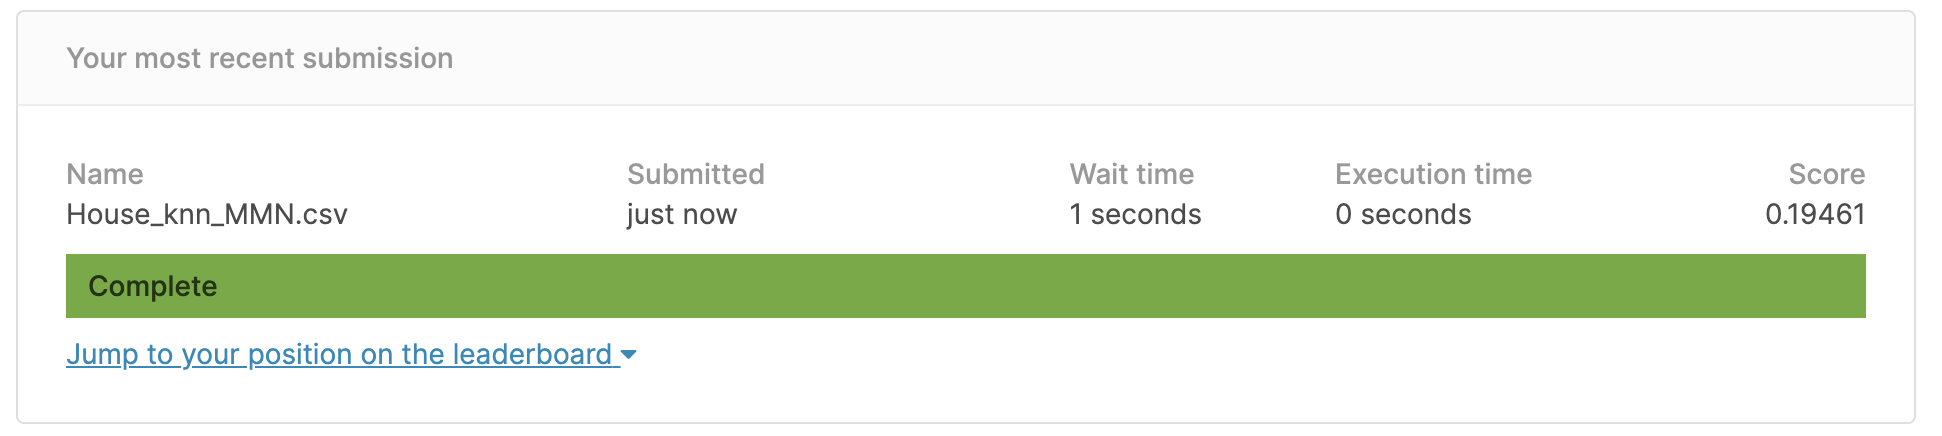

In [106]:
s_Pip_knn1= cross_val_score(knn1_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("knn", "Train", s_Pip_knn1.mean().round(3)))# use cross validation and show the mean of scores

knn Train Score:	0.723 


#### A6- Decision Tree

In [114]:
# define the Pipe line that contain scale and model [Decision Tree]
dt_pipe = Pipeline([
    ('sscaler2_dt', StandardScaler()),
    ('dt_regressor', DecisionTreeRegressor())
])

In [115]:
# Define dictionary of hyperparametersfor both scale and model
dt_pipe_params = {'sscaler2_dt__with_mean': [True, False], 
                 'sscaler2_dt__with_std': [True, False],
                 'dt_regressor__criterion':['mse', 'friedman_mse', 'ma', 'poisson'],
                  'dt_regressor__splitter':['best','random'],
                   'dt_regressor__max_features':[2,5,8,10],
                  'dt_regressor__max_depth':[2, 3, 4, 5, 8,10],
                   'dt_regressor__min_samples_split':[4,8,10]}

In [116]:

dt_pipe_gridsearch = GridSearchCV(dt_pipe, # What is the model we want to fit?
                                 dt_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?                                      
                                verbose=1)

In [117]:
dt_pipe_gridsearch.fit(X_train_data, y_train_data);#do fit for X,y train

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


In [118]:
print('The best score' ,dt_pipe_gridsearch.best_score_)# show the best score
print('The score after GridSearch',dt_pipe_gridsearch.score(X_train_data, y_train_data))#print score for X,y train data
print(f'the best parameters :{dt_pipe_gridsearch.best_params_}')# show the parameter that used in model

The best score 0.734744323735636
The score after GridSearch 0.9155874984905655
the best parameters :{'dt_regressor__criterion': 'mse', 'dt_regressor__max_depth': 8, 'dt_regressor__max_features': 10, 'dt_regressor__min_samples_split': 8, 'dt_regressor__splitter': 'best', 'sscaler2_dt__with_mean': False, 'sscaler2_dt__with_std': False}


In [119]:
#prediction for the best model in pred_dt_best on Train data
trainpredect_dt=dt_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred_dt_best on Test data
testpred_dt= dt_pipe_gridsearch.predict(X_test_data)

In [120]:
print(np.sqrt(mean_squared_error(y_train_data, trainpredect_dt)))#print MSE score

23073.18359005713


In [121]:
print(metrics.mean_squared_error(y_train_data,trainpredect_dt))#print MMSE score

532371800.9804817


In [122]:
# create dataframe that contains ID and testpred_dt
dt_df=pd.DataFrame(testpred_dt,test_data['Id']).reset_index()
dt_df.rename(columns={0:'SalePrice'}, inplace=True)
dt_df.head()# show the head of dataframe

Id      SalePrice
0  1461  125385.483871
1  1462  155734.644444
2  1463  173134.772727
3  1464  173134.772727
4  1465  175781.818182

In [123]:
dt_df.to_csv('./datasets/House_dt_MMN.csv',index=False)# save the dataframe into CSV file to send it to kaggle

This is the score that we got from Kaggle in Decision Tree Resression model

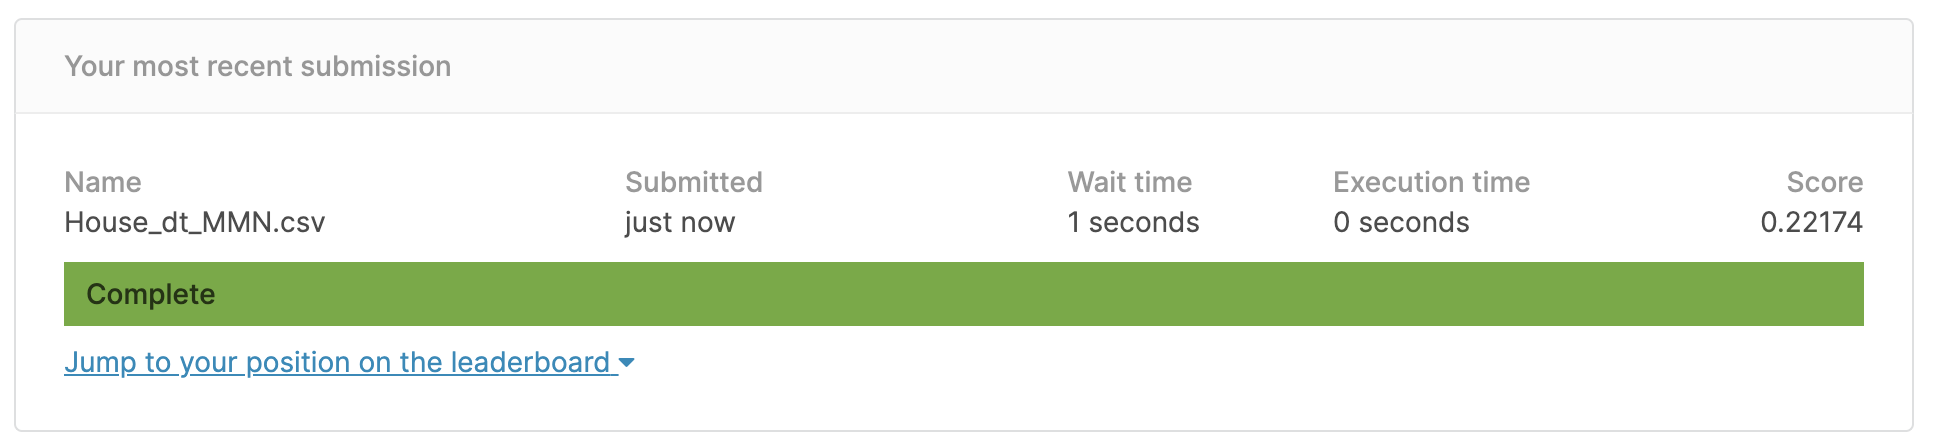

In [124]:
s_Pip_dtree= cross_val_score(dt_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("DecisionTree", "Train", s_Pip_dtree.mean().round(3)))

knn Train Score:	0.672 


#### A7- Extra Tree

In [243]:
# her we do not use scale just identify the parameters for model [Extra Tree]
et_params = {
    'n_estimators': [100, 150, 200],
    'max_features':[5, 7, 8],
    'max_depth': [1, 2, 3, 4, 5, 8],
    'bootstrap':[True, False],
}

In [126]:
et_g = ExtraTreesRegressor()# define the model [Extra tree]

In [127]:
# What is the model we want to fit?
# What is the dictionary of hyperparameters?
 # What number of folds in CV will we use? 
et__gridsearch = GridSearchCV(et_g, param_grid=et_params, cv=5, verbose = 1)
et__gridsearch.fit(X_train_data, y_train_data)# do fit in X,y train data
et__gridsearch.get_params()# show the parametre that used in model

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesRegressor(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [100, 150, 200],
  'max_features': [5, 7, 8],
  'max_depth': [1, 2, 3, 4, 5, 8],
  'bootstrap': ['True', 'False']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

In [128]:
print('The best score' ,et__gridsearch.best_score_)# print the best score
print('The score after GridSearch',et__gridsearch.score(X_train_data, y_train_data))# print the score of X,y train data
print(f'the best parameters :{et__gridsearch.best_params_}')# show best parameter in model

The best score 0.813587338825935
The score after GridSearch 0.9008991524372971
the best parameters :{'bootstrap': 'False', 'max_depth': 8, 'max_features': 7, 'n_estimators': 150}


In [129]:
#prediction for the best model in pred_ET_best on Train data
trainpredect_et=et__gridsearch.predict(X_train_data)
#prediction for the best model in pred_ET_best on Test data
testpred_et= et__gridsearch.predict(X_test_data)

In [130]:
print(np.sqrt(mean_squared_error(y_train_data, trainpredect_et)))#print MSE score

25000.161883613782


In [131]:
print(metrics.mean_squared_error(y_train_data,trainpredect_et))#print MMSE score

625008094.2068954


In [132]:
#create dataframe that contains ID and testpred_et
et_df=pd.DataFrame(testpred_et,test_data['Id']).reset_index()
et_df.rename(columns={0:'SalePrice'}, inplace=True)
et_df.head()# show the head of dataframe

Id      SalePrice
0  1461  133289.534462
1  1462  151959.581611
2  1463  191475.573867
3  1464  188841.742343
4  1465  183854.056394

In [133]:
et_df.to_csv('./datasets/House_ETree_MMN.csv',index=False)# save the dataframe as CSV file to send it to kaggle

This is the score that we got from Kaggle in Extra Tree Resression model

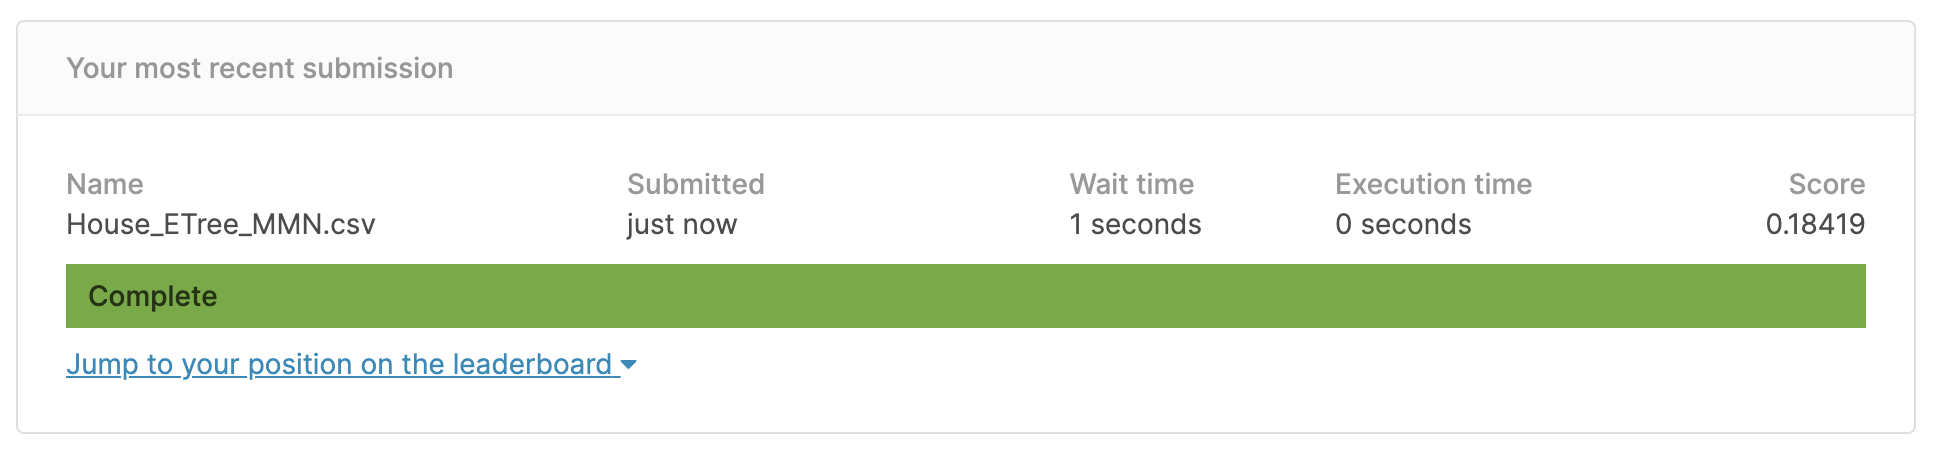

In [134]:
s_Pip_Etree= cross_val_score(et__gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
# do cross_validation and show the mean of scores
print("{} {} Score:\t{:0.3} ".format("ExtraTree", "Train", s_Pip_Etree.mean().round(3)))

knn Train Score:	0.809 


#### A8- BaggingRegressor

In [135]:
# define the PipeLine that contain scale and model [BaggingRegressor]
bagging_pipe = Pipeline([
    ('sscaler2', StandardScaler()),
    ('bagging', BaggingRegressor())])

In [136]:
#set the parameters for both scale and model
bagging_pipe_params = {'sscaler2__with_mean': [True, False], 
                        'sscaler2__with_std': [True, False],
                        'bagging__base_estimator':[DecisionTreeRegressor(),KNeighborsRegressor()],
                        'bagging__n_estimators':[10, 50,100, 200],
                        'bagging__max_samples':[40,60,80,100],
                        'bagging__max_features':[2, 3, 5, 7,8,9],
                        'bagging__bootstrap':[True,False],
                        }

In [137]:
# What is the model we want to fit?
# What is the dictionary of hyperparameters?
 # What number of folds in CV will we use? 
bagging_pipe_gridsearch = GridSearchCV(bagging_pipe,bagging_pipe_params,cv=5, verbose=1)
bagging_pipe_gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('bagging', BaggingRegressor())]),
             param_grid={'bagging__base_estimator': [DecisionTreeRegressor(),
                                                     KNeighborsRegressor()],
                         'bagging__bootstrap': [True, False],
                         'bagging__max_features': [2, 3, 5, 7, 8, 9],
                         'bagging__max_samples': [40, 60, 80, 100],
                         'bagging__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [138]:
bagging_pipe_gridsearch.fit(X_train_data, y_train_data)#do fit for X,y train data

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('bagging', BaggingRegressor())]),
             param_grid={'bagging__base_estimator': [DecisionTreeRegressor(),
                                                     KNeighborsRegressor()],
                         'bagging__bootstrap': [True, False],
                         'bagging__max_features': [2, 3, 5, 7, 8, 9],
                         'bagging__max_samples': [40, 60, 80, 100],
                         'bagging__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [139]:
print('The best score' ,bagging_pipe_gridsearch.best_score_)#show the best score
print('The score after GridSearch',bagging_pipe_gridsearch.score(X_train_data, y_train_data))#show the score of X,y train data
print(f'the best parameters :{bagging_pipe_gridsearch.best_params_}')#show the best parameter that used on fit

The best score 0.7682016954760978
The score after GridSearch 0.7898251993036904
the best parameters :{'bagging__base_estimator': DecisionTreeRegressor(), 'bagging__bootstrap': False, 'bagging__max_features': 9, 'bagging__max_samples': 100, 'bagging__n_estimators': 200, 'sscaler2__with_mean': False, 'sscaler2__with_std': False}


In [140]:
#prediction for the best model in pred_bagging_best on Train data
trainpredect_bagging=bagging_pipe_gridsearch.predict(X_train_data)
#prediction for the best model in pred_bagging_best on Test data
testpred_bagging= bagging_pipe_gridsearch.predict(X_test_data)

In [141]:
print(np.sqrt(mean_squared_error(y_train_data, trainpredect_bagging)))#print MSE score

36407.80182817343


In [142]:
print(metrics.mean_squared_error(y_train_data,trainpredect_bagging))#print MMSE score

1325528033.959549


In [143]:
# create dataframe that contains ID and testpred_bagging 
bagging_df=pd.DataFrame(testpred_bagging,test_data['Id']).reset_index()
bagging_df.rename(columns={0:'SalePrice'}, inplace=True)
bagging_df.head()# show the head of data frame

Id   SalePrice
0  1461  141885.520
1  1462  164430.800
2  1463  194462.320
3  1464  190200.665
4  1465  177726.945

In [144]:
bagging_df.to_csv('./datasets/House_bagging_MMN.csv',index=False)# save the dataframe as CSV file to send it to kaggle

This is the score that we got from Kaggle in bagging Resressor model
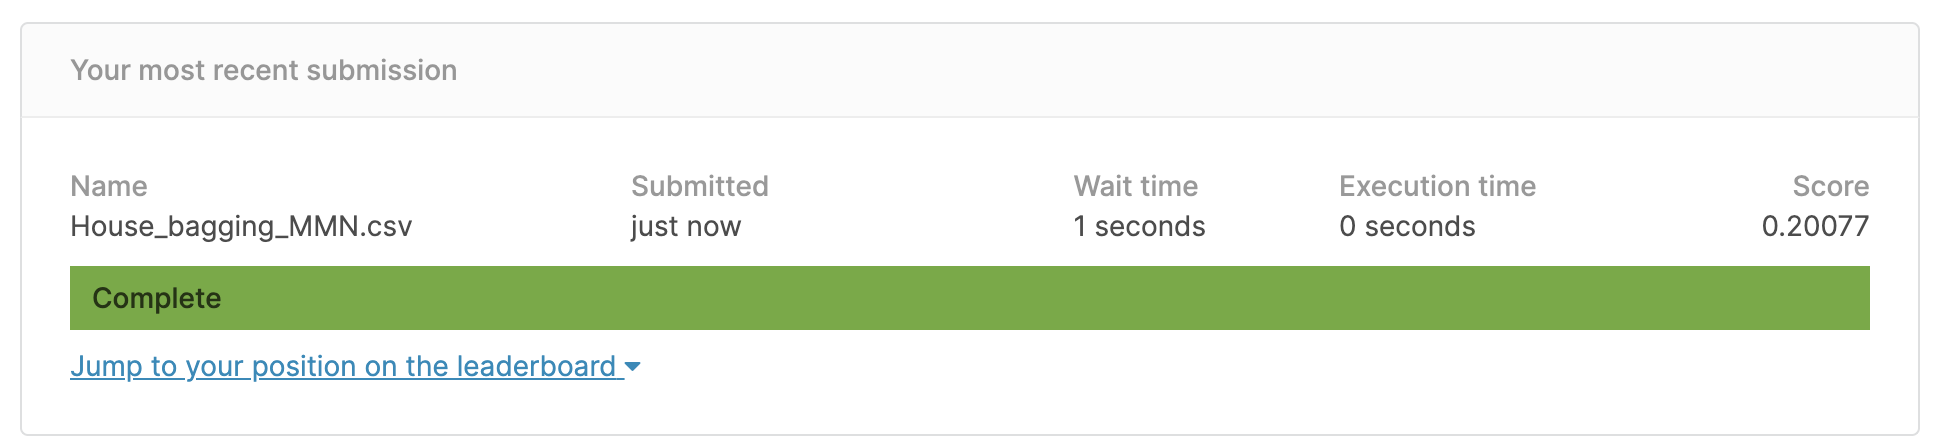

In [145]:
s_Pip_bagging = cross_val_score(bagging_pipe_gridsearch, X_train_data, y_train_data, cv=5, n_jobs=-1)
#do cross validation and show the mean of score
print("{} {} Score:\t{:0.3} ".format("Bagging", "Train", s_Pip_bagging.mean().round(3)))

Ridge Train Score:	0.761 


##### B-Modeling without Scale and Grid_search:
#### B1-DecisionTreeRegressor

In [54]:
DTR = DecisionTreeRegressor()#define model [DecisionTreeRegressor]
DTR.fit(X_train_data, y_train_data)# do fit X,y train
DTR.score(X_train_data, y_train_data)# show the score


0.9999906582992739

In [58]:
#prediction for the best model in pred_DTR_best on Train data
y_pred_train=DTR.predict(X_train_data)
#prediction for the best model in pred_DTR_best on Test data
y_pred = DTR.predict(X_test_data)
y_pred 

array([129900., 165000., 187500., ..., 180500.,  93500., 228000.])

In [59]:
print(np.sqrt(mean_squared_error(y_train_data, y_pred_train)))#print MSE score

242.7264540729941


In [60]:
print(metrics.mean_squared_error(y_train_data,y_pred_train))#print MMSE score

58916.13150684931


In [48]:
DTR_df=pd.DataFrame(y_pred ,test_data['Id']).reset_index()# create dataframe that contains ID and testpred 
DTR_df.rename(columns={0:'SalePrice'}, inplace=True)
DTR_df.head()#show the head

Id  SalePrice
0  1461   129900.0
1  1462   165000.0
2  1463   192000.0
3  1464   181000.0
4  1465   220000.0

In [49]:
DTR_df.to_csv('House_DTR_MMN.csv',index=False)# save the dataframe as CSV file to send it to kaggle

This is the score that we got from Kaggle in Decision Tree model

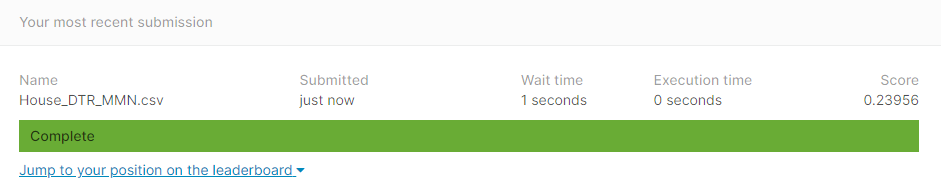

In [61]:
s_DTR= cross_val_score(DTR, X_train_data, y_train_data, cv=5, n_jobs=-1)
#do cross validation and show the mean of score
print("{} {} Score:\t{:0.3} ".format("Decision Tree", "Train", s_DTR.mean().round(3)))

Decision Tree Train Score:	0.667 


#### B2- RandomForestRegressor

In [62]:
RFR = RandomForestRegressor(n_estimators=100, max_features="auto",random_state=0)# define the model [RandomForestRegressor]
RFR.fit(X_train_data, y_train_data)# do fit in X,y train data
print(RFR.score(X_train_data, y_train_data))# show the score

0.9748744175304901


In [63]:
#prediction for the best model in pred_RFR_best on Train data
y_pred_train = RFR.predict(X_train_data)
#prediction for the best model in pred_RFR_best on Test data
y_pred_test = RFR.predict(X_test_data)


In [64]:
print(np.sqrt(mean_squared_error(y_train_data, y_pred_train)))#print MSE score

12588.158591269706


In [65]:
print(metrics.mean_squared_error(y_train_data,y_pred_train))#print MMSE score

158461736.71895733


In [66]:
RFR_df=pd.DataFrame(y_pred_test ,test_data['Id']).reset_index()# create dataframe that contains ID and testpred
RFR_df.rename(columns={0:'SalePrice'}, inplace=True)
RFR_df.head()#show head

Id  SalePrice
0  1461  119330.08
1  1462  161025.59
2  1463  192740.50
3  1464  186532.50
4  1465  185468.26

In [61]:
RFR_df.to_csv('House_RFR_MMN.csv',index=False)# save the dataframe as CSV file to send it to kaggle

This is the score that we got from Kaggle in Random Forest model

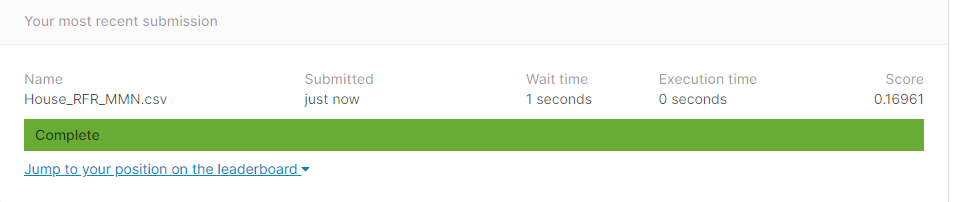

In [67]:
s_RFR= cross_val_score(RFR, X_train_data, y_train_data, cv=5, n_jobs=-1)
#do cross validation and show the mean of scores
print("{} {} Score:\t{:0.3} ".format("Random Forest", "Train", s_RFR.mean().round(3)))

Random Forest Train Score:	0.833 


#### B3-AdaBoostRegressor

In [70]:

ABR = AdaBoostRegressor(n_estimators=100)
ABR.fit(X_train_data, y_train_data)
ABR.score(X_train_data ,y_train_data)

0.8259029137721562

In [76]:
#prediction for the best model in pred_ABR_best on Train data
y_pred_train = ABR.predict(X_train_data)
#prediction for the best model in pred_ABR_best on Test data
y_pred_test = ABR.predict(X_test_data)


In [77]:
ABR_df=pd.DataFrame(y_pred_test ,test_data['Id']).reset_index()# create dataframe that contains ID and testpred

ABR_df.rename(columns={0:'SalePrice'}, inplace=True)
ABR_df.head()

Id      SalePrice
0  1461  147467.296875
1  1462  160087.143959
2  1463  218908.309133
3  1464  206474.800000
4  1465  188580.817556

In [78]:
ABR_df.to_csv('House_ABR_MMN.csv',index=False)# save the dataframe as CSV file to send it to kaggle

This is the score that we got from Kaggle in AdaBoostRegressot model

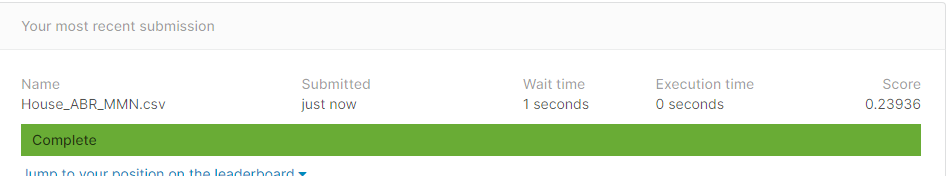

In [79]:
s_ABR= cross_val_score(ABR, X_train_data, y_train_data, cv=5, n_jobs=-1)
#do cross validation and show the mean of scores
print("{} {} Score:\t{:0.3} ".format("AdaBoostRegressot", "Train", s_ABR.mean().round(3)))

AdaBoostRegressot Train Score:	0.747 


#### B4-  GradientBoostingRegressor

In [80]:
# degine the model [GradientBoostingRegressor]
GBR = GradientBoostingRegressor(n_estimators=100)
GBR.fit(X_train_data, y_train_data)# do fit for X,y train dat
GBR.score(X_train_data, y_train_data)# display the score 


0.9427315079225033

In [81]:
y_pred_train = GBR.predict(X_train_data)##prediction for the best model in pred_GBR_best on Train data

y_pred = GBR.predict(X_test_data)#prediction for the best model in pred_GBR_best on Test data



In [82]:
GBR_df=pd.DataFrame(y_pred ,test_data['Id']).reset_index()
GBR_df.rename(columns={0:'SalePrice'}, inplace=True)
GBR_df.head()

Id      SalePrice
0  1461  129882.447526
1  1462  161379.671539
2  1463  201339.510189
3  1464  192399.606331
4  1465  184828.732972

In [83]:
GBR_df.to_csv('House_GBR_MMN.csv',index=False)# save the dataframe as CSV file to send it to kaggle

This is the score that we got from Kaggle in GradientBoosting model

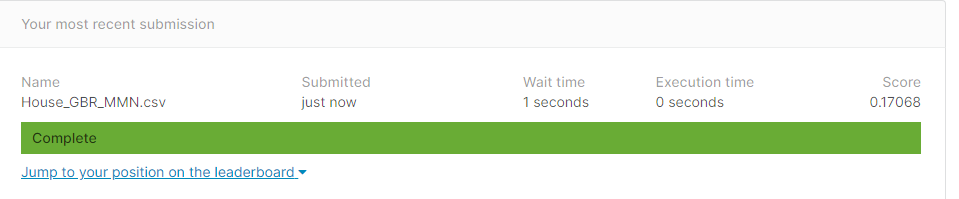

In [84]:
s_GBR= cross_val_score(GBR, X_train_data, y_train_data, cv=5, n_jobs=-1)
#do cross validation and show the mean of scores
print("{} {} Score:\t{:0.3} ".format("GradientBoosting", "Train", s_GBR.mean().round(3)))

GradientBoosting Train Score:	0.846 


------
### Second Sterategy: using features that have high correlation with target:


**discover most correlated Features**

In [49]:
matrix = train_data.corr()# save the correlation in matrix

<AxesSubplot:>

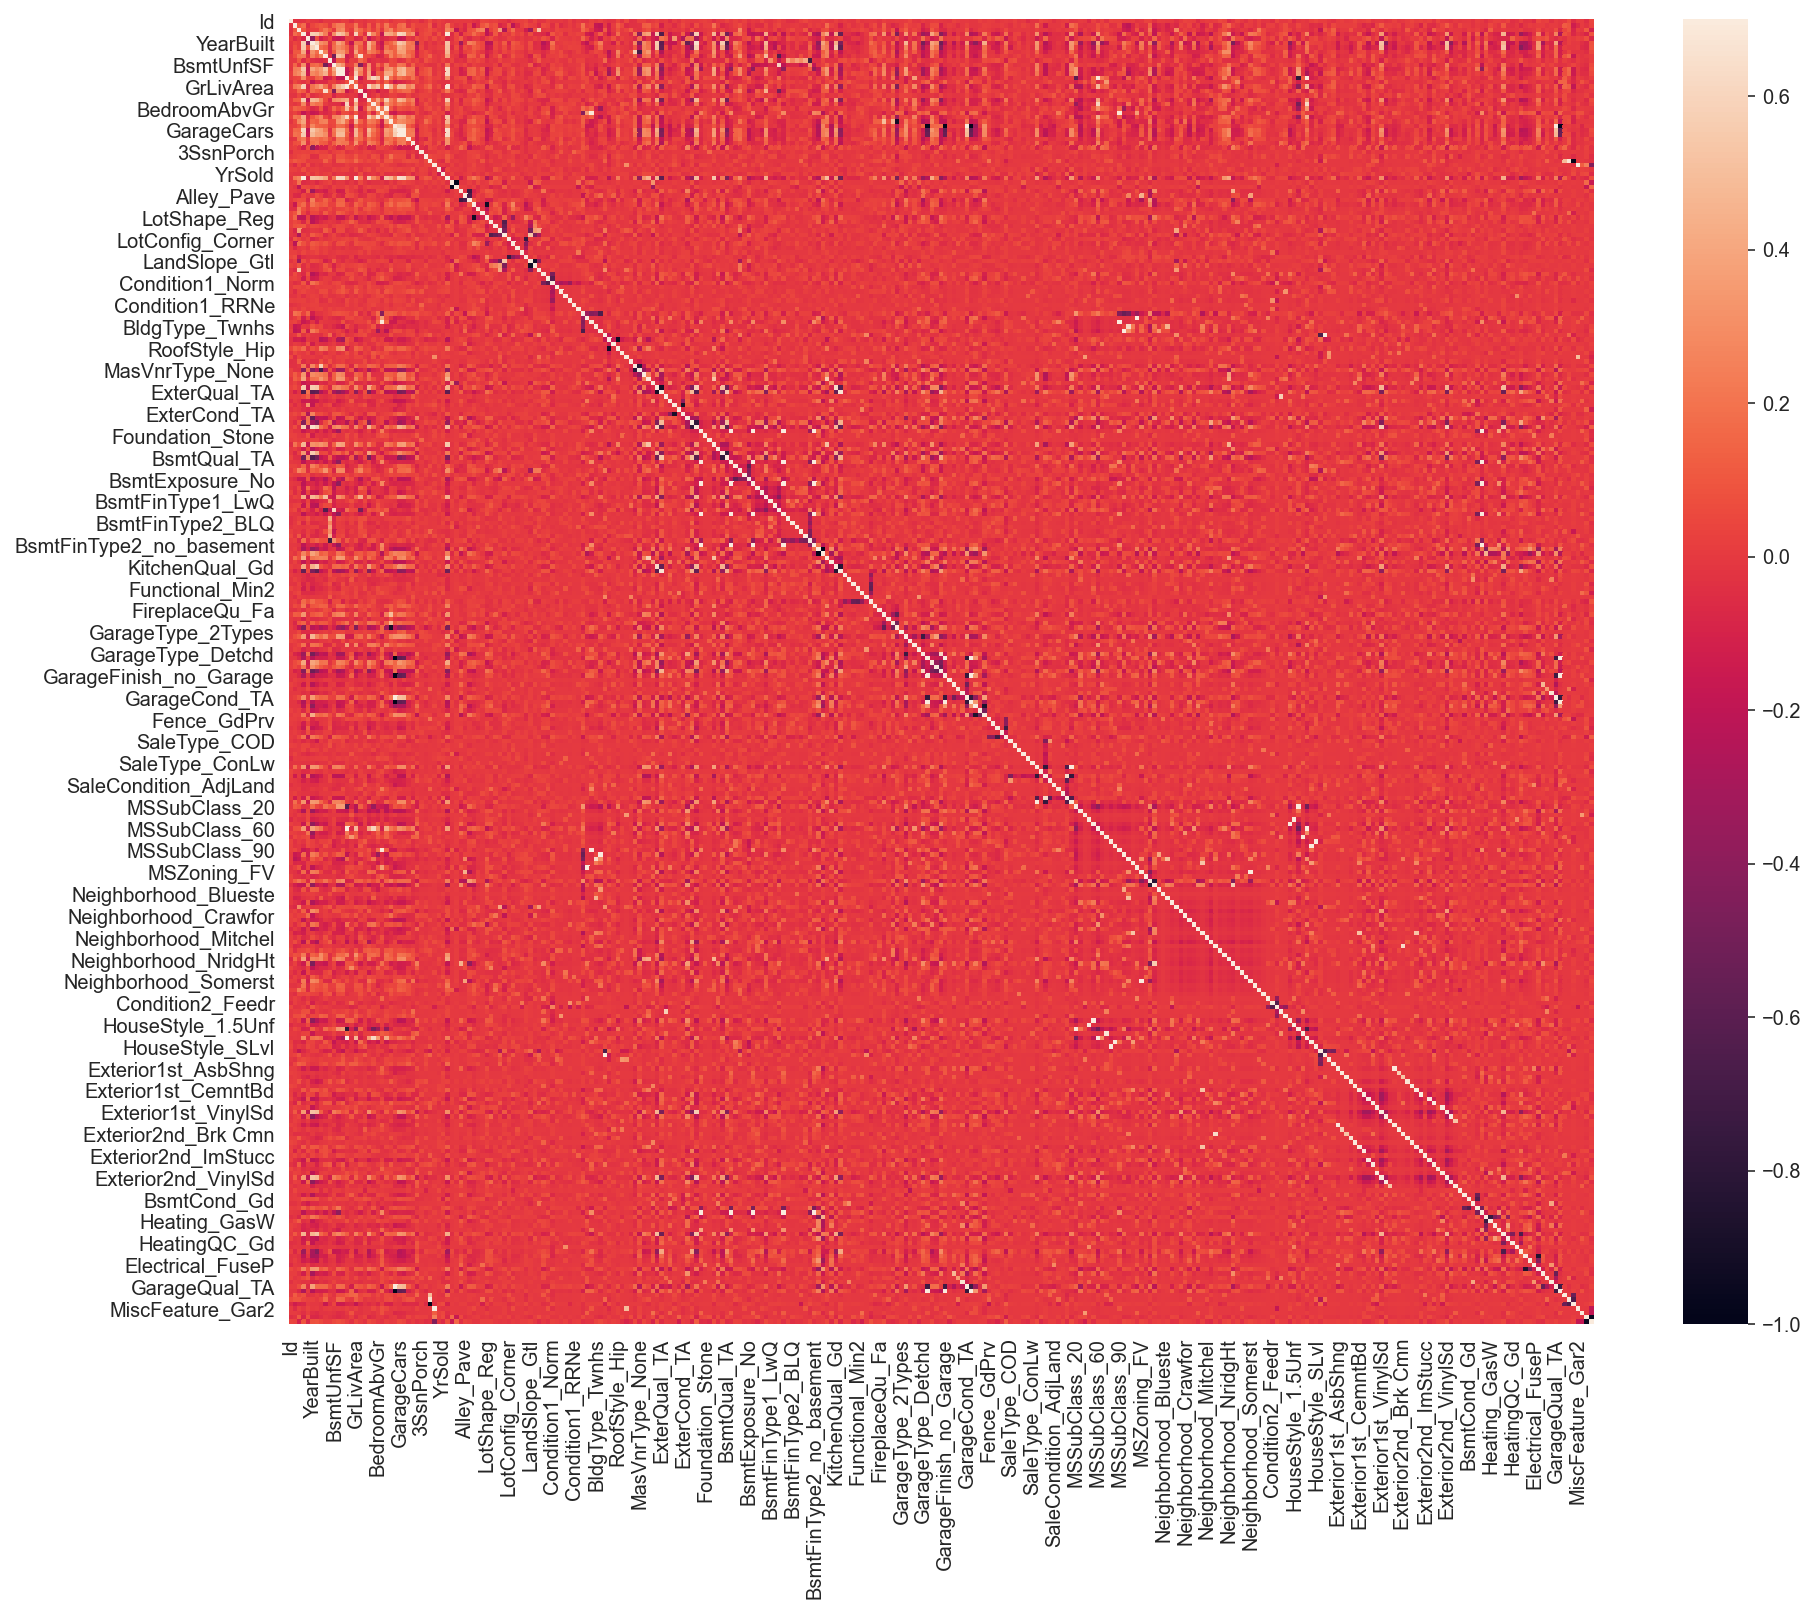

In [50]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, vmax=0.7, square=True)
# show in corr in heatmap

In [51]:
#define variable that contain sorting correlation value of features with target [SalePrice]
interesting_variables = matrix['SalePrice'].sort_values(ascending=False)
# Filter out the target variables (SalePrice) and variables with a low correlation score (v such that -0.6 <= v <= 0.6)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.6]
interesting_variables = interesting_variables[interesting_variables.index != 'SalePrice']
interesting_variables
# show the name of features that have high correlation with target

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [52]:
pred_vars = [v for v in interesting_variables.index.values if v != 'SalePrice']# save the name of columns in list
target_var = 'SalePrice'
#assign the X-train that contains the high corr with target 
X_train = train_data[pred_vars]
y_train = train_data[target_var]#assign target [SalePrice]in y_train 
# do the same in X_test
test_select_features=[v for v in interesting_variables.index.values]
X_test=test_data[test_select_features] 


#### 1-a RandomForestRegressor 
without scale and grid_search 

In [151]:
#define the model[Random forest] with its parameter
model_RF = RandomForestRegressor(n_estimators=10, random_state=42,max_depth= 1, max_features= 2,bootstrap=True)
model_RF.fit(X_train, y_train)#do fit in X_train and y_train

RandomForestRegressor(max_depth=1, max_features=2, n_estimators=10,
                      random_state=42)

In [152]:
y_pred = model_RF.predict(X_test)#do predict in X_test
y_pred# show the array of prediction

array([168733.14659356, 154680.94138173, 172976.73081217, ...,
       154680.94138173, 154680.94138173, 241464.62634472])

In [153]:
#prediction for the best model in RF_model_trainpredect on Train data
model_RF_trainpredect=model_RF.predict(X_train)
#prediction for the best model in RF_model_testpred_lr on Test data
model_RF_testpred= model_RF.predict(X_test)

In [154]:
print(np.sqrt(mean_squared_error(y_train, model_RF_trainpredect)))#print the MSE score

55574.350356757284


In [155]:
print(metrics.mean_squared_error(y_train,model_RF_trainpredect))#print MMSE score

3088508417.5756087


In [156]:
print('Random Forest Regressor score: ',model_RF.score(X_train, y_train))# print the score of X,y train data

Random Forest Regressor score:  0.5102882591069837


In [157]:
# create the dataframe that contains ID and testpred_RF 
RF_df=pd.DataFrame(model_RF_testpred,test_data['Id']).reset_index()
RF_df.rename(columns={0:'SalePrice'}, inplace=True)
RF_df.head()# show the head of dataframe

Id      SalePrice
0  1461  168733.146594
1  1462  154680.941382
2  1463  172976.730812
3  1464  172976.730812
4  1465  180099.226434

In [158]:
RF_df.to_csv('./datasets/RF_corr_MMN.csv',index=False)#save the dataframe as CSV file to be ready sending to Kaggle 

This is the score that we got from Kaggle in Random Forest  Resressor model

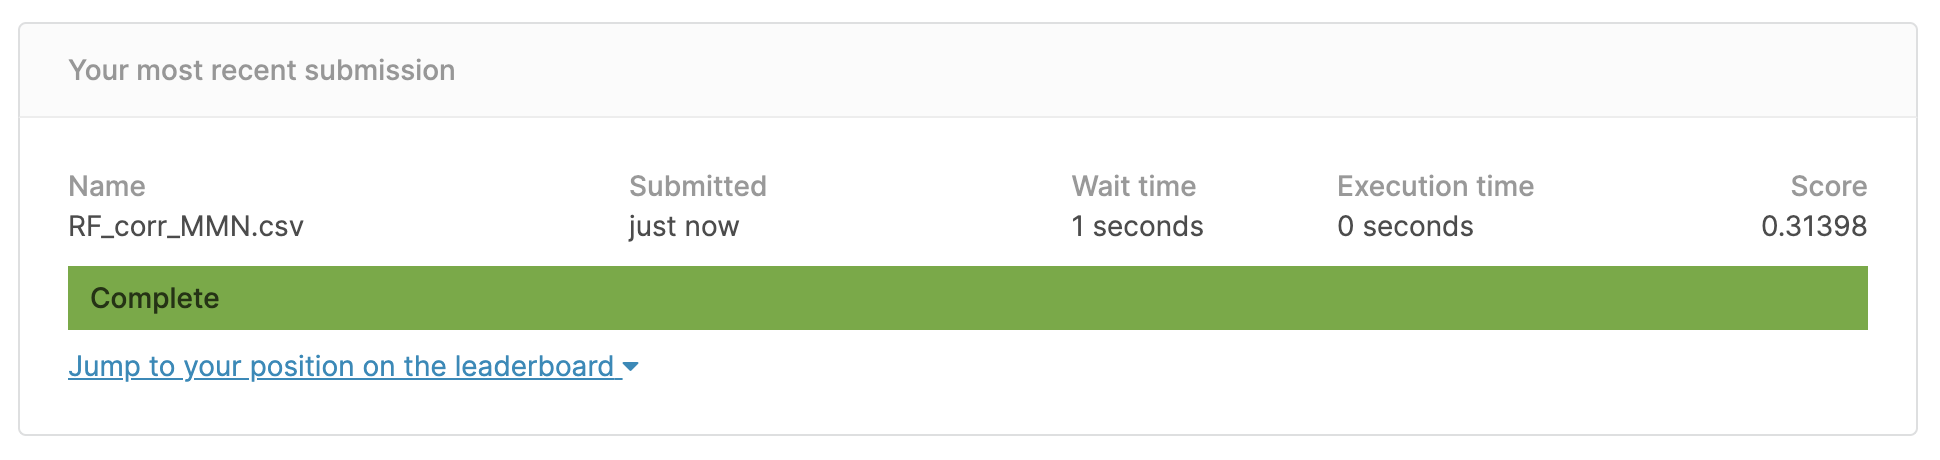

In [159]:
c_Pip_RF= cross_val_score(model_RF, X_train_data, y_train_data, cv=5, n_jobs=-1)
# do cross validation and show the mean of scors
print("{} {} Score:\t{:0.3} ".format("RandomForest", "Train", c_Pip_RF.mean().round(3)))

Ridge Train Score:	0.383 


#### 1-b RandomForestRegressor 
with scale and grid Search

In [160]:
#define the Pipeline that contains scaling and model[RandomForestRegressor]
RF_pipe = Pipeline([
    ('sscaler2', StandardScaler()),
    ('RF', RandomForestRegressor())
])

In [161]:
# Define dictionary of hyperparameters for both scale and model
RF_pipe_params = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'RF__n_estimators': [10, 50, 100, 200],
                 'RF__max_features':[2, 3, 5, 7, 8,9],
                 'RF__max_depth': [1, 2, 3, 4, 5, 8],
                 'RF__bootstrap':[True,False]
                  }

In [162]:
# Instantiate our GridSearchCV object.
RF_pipe_gridsearch = GridSearchCV(RF_pipe, # What is the model we want to fit?
                                 RF_pipe_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                   verbose=1)

In [163]:
RF_pipe_gridsearch.fit(X_train, y_train)# do fit X_train and y_train

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('RF', RandomForestRegressor())]),
             param_grid={'RF__bootstrap': [True, False],
                         'RF__max_depth': [1, 2, 3, 4, 5, 8],
                         'RF__max_features': [2, 3, 5, 7, 8, 9],
                         'RF__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [164]:
print('The best score' ,RF_pipe_gridsearch.best_score_)#print the best score
print('The score after GridSearch',RF_pipe_gridsearch.score(X_train, y_train))# print the score of Xtrain and y_train
print(f'the best parameters :{RF_pipe_gridsearch.best_params_}')#show the parameter that used in fit

The best score 0.828412416104005
The score after GridSearch 0.9303291320260468
the best parameters :{'RF__bootstrap': True, 'RF__max_depth': 8, 'RF__max_features': 2, 'RF__n_estimators': 200, 'sscaler2__with_mean': True, 'sscaler2__with_std': True}


In [165]:
#prediction for the best model in pred_RF_best on Train data
trainpredect_fr=RF_pipe_gridsearch.predict(X_train)
#prediction for the best model in pred_RF_best on Test data
testpred_rf= RF_pipe_gridsearch.predict(X_test)

In [166]:
print(np.sqrt(mean_squared_error(y_train, trainpredect_fr)))# print MSE score

20961.856665608277


In [167]:
print(metrics.mean_squared_error(y_train,trainpredect_fr))#print MMSE score

439399434.8695062


In [168]:
#create dataframe that contains ID and testpred_rf
RF1_df=pd.DataFrame(testpred_rf,test_data['Id']).reset_index()
RF1_df.rename(columns={0:'SalePrice'}, inplace=True)
RF1_df.head()# show the head of dataframe

Id      SalePrice
0  1461  126028.682707
1  1462  151089.728252
2  1463  154420.820734
3  1464  179142.076236
4  1465  207581.006863

In [169]:
RF1_df.to_csv('./datasets/Housing_RFgs_MMN.csv',index=False)# save the dataframe as CSV file to send it ro kaggle

This is the score that we got from Kaggle in Random Forest  Resressor model
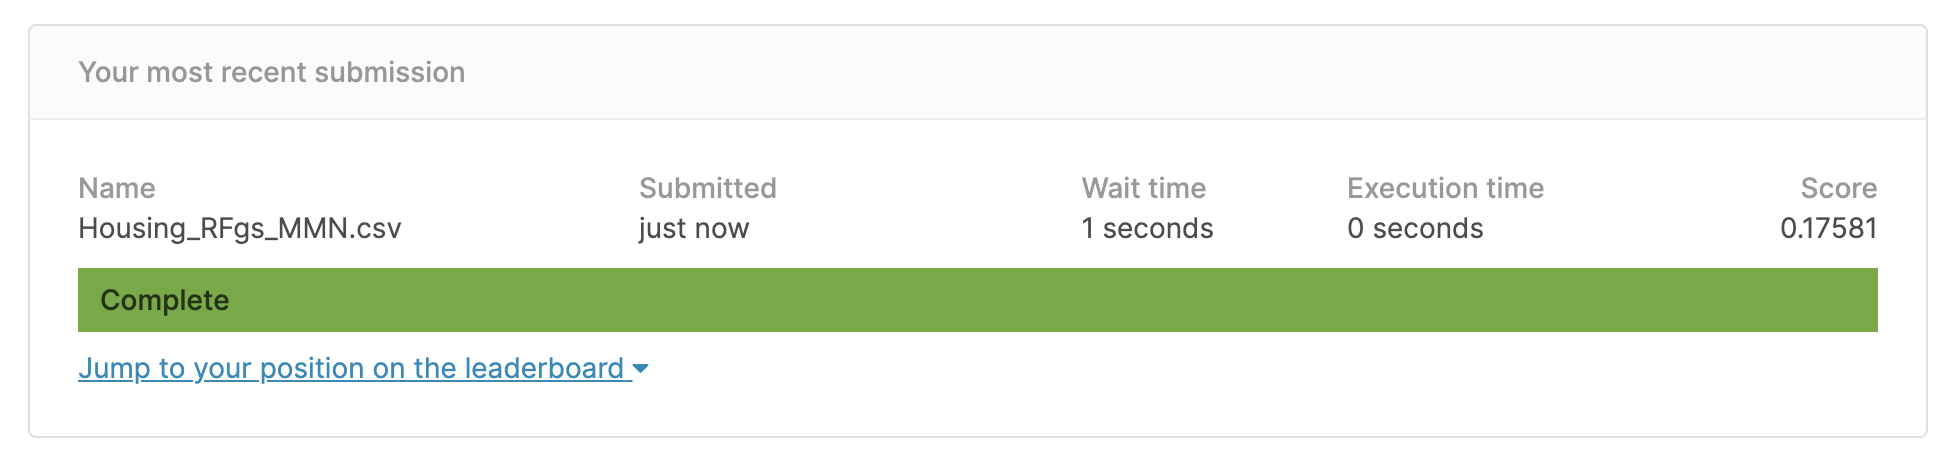

As we see there are a big different on score after using scale and grid_search. The score much better than before
Ater that, we decied to skip idea that used model with out scale and grid_search

In [170]:
c_Pip_RFG= cross_val_score(RF_pipe_gridsearch, X_train, y_train, cv=5, n_jobs=-1)# do cross validation and show the mean of scores
print("{} {} Score:\t{:0.3} ".format("RandomForest", "Train", c_Pip_RFG.mean().round(3)))

Ridge Train Score:	0.819 


#### 2- Bagging

In [171]:
# define Pipeline that contains scale and model[BaggingRegressor]
bagging_pipe2 = Pipeline([
    ('sscaler2', StandardScaler()),
    ('bagging', BaggingRegressor())])

In [172]:
#define parameter for both scale and model
bagging_pipe_params2 = {'sscaler2__with_mean': [True, False], 
                        'sscaler2__with_std': [True, False],
                        'bagging__base_estimator':[DecisionTreeRegressor(),KNeighborsRegressor()],
                        'bagging__n_estimators':[10, 50,100, 200],
                        'bagging__max_samples':[40,60,80,100],
                        'bagging__max_features':[2, 3, 5, 7,8,9],
                        'bagging__bootstrap':[True,False],
                        }

In [173]:
# What is the model we want to fit?
# What is the dictionary of hyperparameters?
 # What number of folds in CV will we use? 
bagging_pipe_gridsearch2 = GridSearchCV(bagging_pipe2,bagging_pipe_params2,cv=5, verbose=1)
bagging_pipe_gridsearch2# 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('bagging', BaggingRegressor())]),
             param_grid={'bagging__base_estimator': [DecisionTreeRegressor(),
                                                     KNeighborsRegressor()],
                         'bagging__bootstrap': [True, False],
                         'bagging__max_features': [2, 3, 5, 7, 8, 9],
                         'bagging__max_samples': [40, 60, 80, 100],
                         'bagging__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [174]:
bagging_pipe_gridsearch2.fit(X_train, y_train)# do fit  for X,y train data

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('bagging', BaggingRegressor())]),
             param_grid={'bagging__base_estimator': [DecisionTreeRegressor(),
                                                     KNeighborsRegressor()],
                         'bagging__bootstrap': [True, False],
                         'bagging__max_features': [2, 3, 5, 7, 8, 9],
                         'bagging__max_samples': [40, 60, 80, 100],
                         'bagging__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [175]:
print('The best score' ,bagging_pipe_gridsearch2.best_score_)#print the best score
print('The score after GridSearch',bagging_pipe_gridsearch2.score(X_train, y_train))#print score for X,y train
print(f'the best parameters :{bagging_pipe_gridsearch2.best_params_}')#print the best parameter that used in fit

The best score 0.8097403594930952
The score after GridSearch 0.8276273894285677
the best parameters :{'bagging__base_estimator': DecisionTreeRegressor(), 'bagging__bootstrap': True, 'bagging__max_features': 5, 'bagging__max_samples': 100, 'bagging__n_estimators': 100, 'sscaler2__with_mean': False, 'sscaler2__with_std': False}


In [176]:
#prediction for the best model in pred_bagging_best on Train data
trainpredect_bagging2=bagging_pipe_gridsearch2.predict(X_train)
#prediction for the best model in pred_bagging_best on Test data
testpred_bagging2= bagging_pipe_gridsearch2.predict(X_test)

In [177]:
print(np.sqrt(mean_squared_error(y_train, trainpredect_bagging2)))# print MSE score

32971.46664585561


In [178]:
print(metrics.mean_squared_error(y_train,trainpredect_bagging2))#print MMSE score

1087117612.778769


In [179]:
#create dataframe that contains ID and testpred_bagging2
bagging_df2=pd.DataFrame(testpred_bagging2,test_data['Id']).reset_index()
bagging_df2.rename(columns={0:'SalePrice'}, inplace=True)
bagging_df2.head()# show the head of dataframe

Id  SalePrice
0  1461  131794.82
1  1462  157907.23
2  1463  157523.62
3  1464  177828.63
4  1465  215811.51

In [180]:
bagging_df2.to_csv('./datasets/House_bagging_corr_MMN.csv',index=False)
#save the dataframe as CSV file to send it to Kaggle

This is the score that we got from Kaggle in bagging  Resressor model
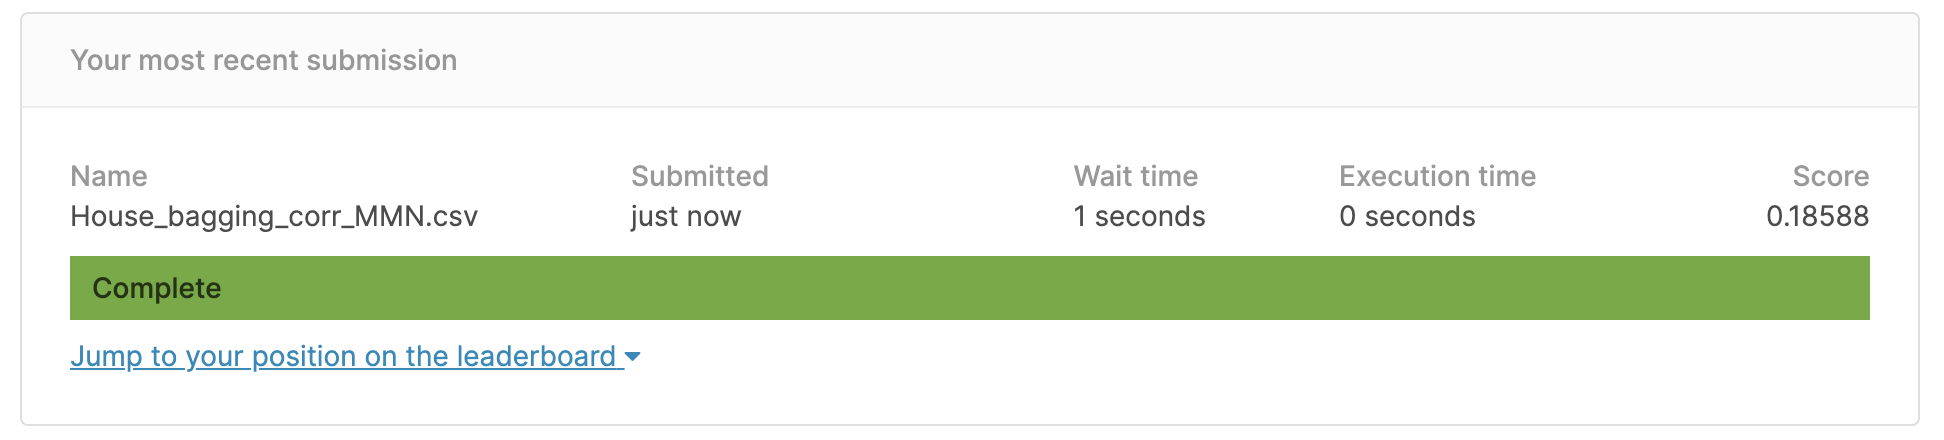

In [181]:
# do cross viledation and show the mean of score
s_Pip_bagging2 = cross_val_score(bagging_pipe_gridsearch2, X_train, y_train, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("Bagging", "Train", s_Pip_bagging2.mean().round(3)))

Ridge Train Score:	0.807 


#### 3- Extra Tree

In [244]:
#define the parameter of model[ExtraTreesRegressor]
et_params2 = {
    'n_estimators': [100, 150, 200],
    'max_features':[5, 7, 8],
    'max_depth': [1, 2, 3, 4, 5, 8],
    'bootstrap':[True, False],
}

In [183]:
et_g2 = ExtraTreesRegressor()#define the model

In [185]:
# What is the model we want to fit?
# What is the dictionary of hyperparameters?
 # What number of folds in CV will we use? 
et__gridsearch2 = GridSearchCV(et_g2, et_params2, cv=5, verbose = 1)
et__gridsearch2.fit(X_train, y_train)
et__gridsearch2.get_params()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesRegressor(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [100, 150, 200],
  'max_features': [5, 7, 8],
  'max_depth': [1, 2, 3, 4, 5, 8],
  'bootstrap': ['True', 'False']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

In [186]:
print('The best score' ,et__gridsearch2.best_score_)#show thw best score
print('The score after GridSearch',et__gridsearch2.score(X_train, y_train))# show R2 score of X,y train data
print(f'the best parameters :{et__gridsearch2.best_params_}')# show the best parameter that used in fit

The best score 0.8249928836950045
The score after GridSearch 0.9100598547705168
the best parameters :{'bootstrap': 'True', 'max_depth': 8, 'max_features': 5, 'n_estimators': 150}


In [187]:
#prediction for the best model in pred_et_best on Train data
trainpredect_et2=et__gridsearch2.predict(X_train)
#prediction for the best model in pred_et_best on Test data
testpred_et2= et__gridsearch2.predict(X_test)

In [188]:
print(np.sqrt(mean_squared_error(y_train, trainpredect_et2)))#print MSE score

23816.663941407984


In [189]:
print(metrics.mean_squared_error(y_train,trainpredect_et2))#print MMSE score

567233481.2979633


In [190]:
##create dataframe that contains Id and testpred
et_df2=pd.DataFrame(testpred_et2,test_data['Id']).reset_index()
et_df2.rename(columns={0:'SalePrice'}, inplace=True)
et_df2.head()# show the head od dataframe

Id      SalePrice
0  1461  124140.153590
1  1462  151219.161050
2  1463  149060.197050
3  1464  175853.322003
4  1465  217707.425637

In [191]:
#save the dataframe in CSV file and send it to kaggle
et_df2.to_csv('./datasets/House_ETree_corr_MMN.csv',index=False)

This is the score that we got from Kaggle in Extra_Tree  Resressor model
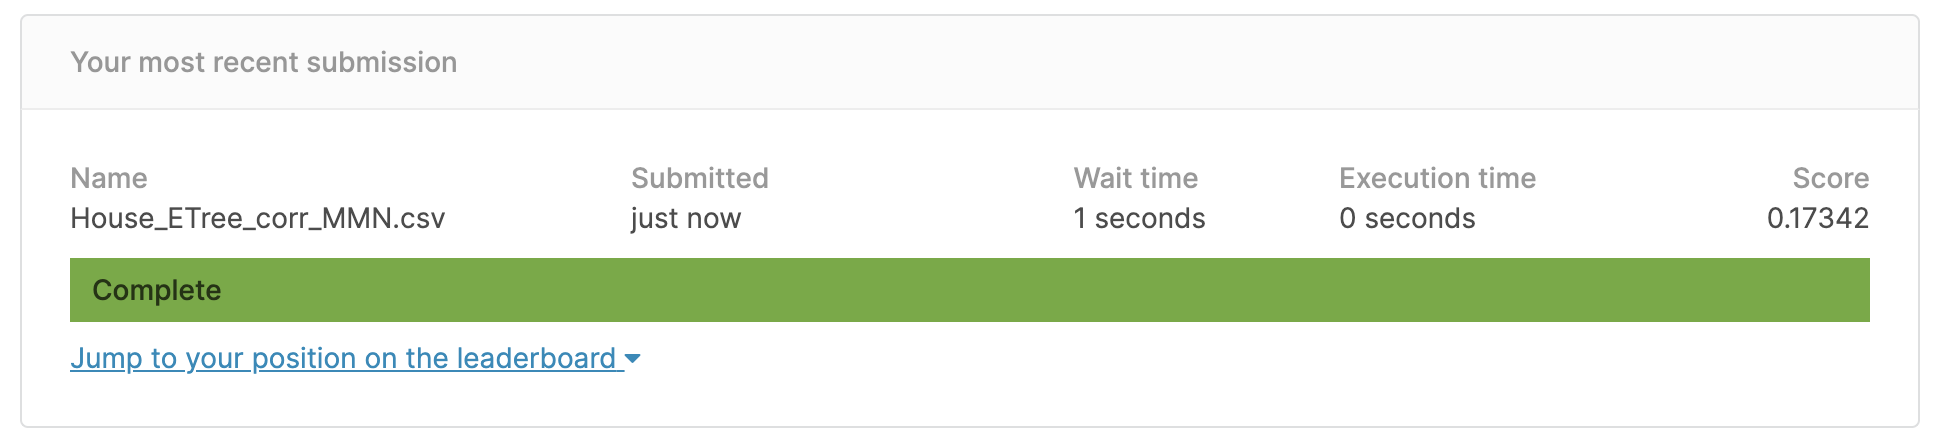

In [192]:
#do cross validition and show the mean of scores
c_Pip_Etree= cross_val_score(et__gridsearch2, X_train, y_train, cv=5, n_jobs=-1)
print("{} {} Score:\t{:0.3} ".format("ET", "Train", c_Pip_Etree.mean().round(3)))

knn Train Score:	0.822 


--------
### Third Sterategy: using all features:


In [53]:
#preparing for modeling
y_train_a=train_data['SalePrice']#assign target in y_train_a
X_train_a=train_data.drop (['SalePrice'],axis=1)  #assign all fearture without target in X_train_a
X_test_a=test_data# assign all features in test data in X_test_a


#### 1-RandomForestRegressor

In [194]:
#define the Pipeline that contains scale and model [RandomForest] 
RF_pipe_a = Pipeline([
    ('sscaler2', StandardScaler()),
    ('RF', RandomForestRegressor())
])

In [195]:
# Define dictionary of hyperparameters for both scale and model
RF_pipe_params_a = {'sscaler2__with_mean': [True, False], 
                 'sscaler2__with_std': [True, False],
                 'RF__n_estimators': [10, 50, 100, 200],
                 'RF__max_features':[2, 3, 5, 7, 8,9],
                 'RF__max_depth': [1, 2, 3, 4, 5, 8],
                 'RF__bootstrap':[True,False]
                  }

In [196]:
# Instantiate our GridSearchCV object.
RF_pipe_gridsearch_a = GridSearchCV(RF_pipe_a, # What is the model we want to fit?
                                 RF_pipe_params_a, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
#                                  scoring='roc_auc',
                                   verbose=1)

In [197]:
RF_pipe_gridsearch_a.fit(X_train_a, y_train_a)# do fit in X,y _train_a

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('RF', RandomForestRegressor())]),
             param_grid={'RF__bootstrap': [True, False],
                         'RF__max_depth': [1, 2, 3, 4, 5, 8],
                         'RF__max_features': [2, 3, 5, 7, 8, 9],
                         'RF__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [198]:
print('The best score' ,RF_pipe_gridsearch_a.best_score_)#print bestscore
print('The score after GridSearch',RF_pipe_gridsearch_a.score(X_train_a, y_train_a))#print score for X,y train_data_a
print(f'the best parameters :{RF_pipe_gridsearch_a.best_params_}')# show the parameter that used in fit

The best score 0.8173833289562633
The score after GridSearch 0.925608712575233
the best parameters :{'RF__bootstrap': False, 'RF__max_depth': 8, 'RF__max_features': 9, 'RF__n_estimators': 50, 'sscaler2__with_mean': True, 'sscaler2__with_std': False}


In [199]:
#prediction for the best model in pred_RF_best on Train data
trainpredect_fr_a=RF_pipe_gridsearch_a.predict(X_train_a)
#prediction for the best model in pred_RF_best on Test data
testpred_rf_a= RF_pipe_gridsearch_a.predict(X_test_a)

In [200]:
print(np.sqrt(mean_squared_error(y_train_a, trainpredect_fr_a)))#print MSE score

21660.335232400248


In [201]:
print(metrics.mean_squared_error(y_train_a,trainpredect_fr_a))#print MMSE score

469170122.3799596


In [202]:
#create dataframe that contains ID and testpred
RF1_df_a=pd.DataFrame(testpred_rf_a,test_data['Id']).reset_index()
RF1_df_a.rename(columns={0:'SalePrice'}, inplace=True)
RF1_df_a.head()#show the head of dataframe

Id      SalePrice
0  1461  129399.651984
1  1462  153760.236609
2  1463  188724.184652
3  1464  202710.146775
4  1465  201376.075049

In [203]:
RF1_df_a.to_csv('./datasets/Housing_RFgs_a_MMN.csv',index=False)#save the dataframe as CSV file to send it to kaggle

This is the score that we got from Kaggle in Random Forest Resressor model with all
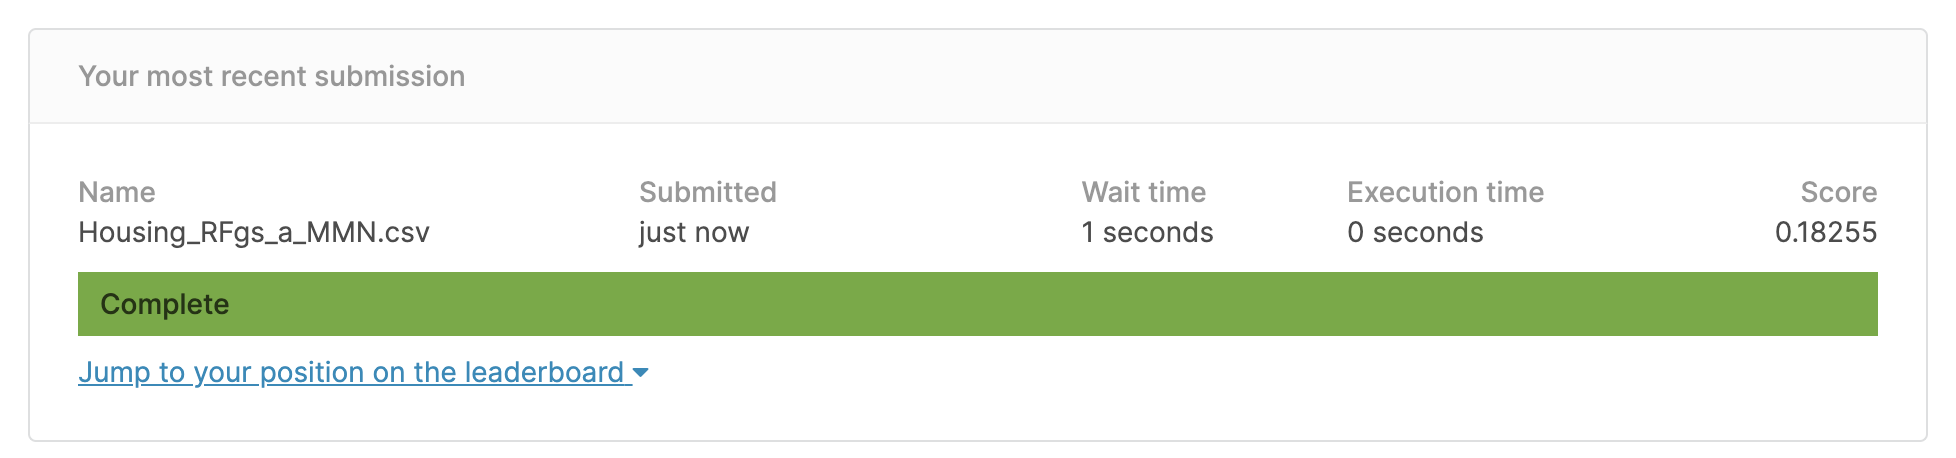

In [204]:
#do cross validation and show the mean of scores
Pip_RFG_a= cross_val_score(RF_pipe_gridsearch_a, X_train_a, y_train_a, cv=5, n_jobs=1)
print("{} {} Score:\t{:0.3} ".format("RF", "Train", Pip_RFG_a.mean().round(3)))

Ridge Train Score:	0.812 


#### 2- Bagging

In [205]:
#identify the PipeLine that contains scale and model[BaggingRegressor]
bagging_pipe_a = Pipeline([
    ('sscaler2', StandardScaler()),
    ('bagging', BaggingRegressor())])

In [206]:
#define parameters for both scale and model
bagging_pipe_params_a = {'sscaler2__with_mean': [True, False], 
                        'sscaler2__with_std': [True, False],
                        'bagging__base_estimator':[DecisionTreeRegressor(),KNeighborsRegressor()],
                        'bagging__n_estimators':[10, 50,100, 200],
                        'bagging__max_samples':[40,60,80,100],
                        'bagging__max_features':[2, 3, 5, 7,8,9],
                        'bagging__bootstrap':[True,False],
                        }

In [207]:
# What is the model we want to fit?
# What is the dictionary of hyperparameters?
 # What number of folds in CV will we use? 
bagging_pipe_gridsearch_a = GridSearchCV(bagging_pipe_a,bagging_pipe_params_a,cv=5, verbose=1)
bagging_pipe_gridsearch2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('bagging', BaggingRegressor())]),
             param_grid={'bagging__base_estimator': [DecisionTreeRegressor(),
                                                     KNeighborsRegressor()],
                         'bagging__bootstrap': [True, False],
                         'bagging__max_features': [2, 3, 5, 7, 8, 9],
                         'bagging__max_samples': [40, 60, 80, 100],
                         'bagging__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [208]:
bagging_pipe_gridsearch_a.fit(X_train_a, y_train_a)# do fit X,y train_a

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sscaler2', StandardScaler()),
                                       ('bagging', BaggingRegressor())]),
             param_grid={'bagging__base_estimator': [DecisionTreeRegressor(),
                                                     KNeighborsRegressor()],
                         'bagging__bootstrap': [True, False],
                         'bagging__max_features': [2, 3, 5, 7, 8, 9],
                         'bagging__max_samples': [40, 60, 80, 100],
                         'bagging__n_estimators': [10, 50, 100, 200],
                         'sscaler2__with_mean': [True, False],
                         'sscaler2__with_std': [True, False]},
             verbose=1)

In [209]:
print('The best score' ,bagging_pipe_gridsearch_a.best_score_)# show the best score
print('The score after GridSearch',bagging_pipe_gridsearch_a.score(X_train_a, y_train_a))# show score for X,y train_a
print(f'the best parameters :{bagging_pipe_gridsearch_a.best_params_}')# show the best parameter that used in fit

The best score 0.5417439345769883
The score after GridSearch 0.4983644655797723
the best parameters :{'bagging__base_estimator': DecisionTreeRegressor(), 'bagging__bootstrap': True, 'bagging__max_features': 9, 'bagging__max_samples': 60, 'bagging__n_estimators': 50, 'sscaler2__with_mean': True, 'sscaler2__with_std': True}


In [210]:
#prediction for the best model in pred_bagging_best on Train data
trainpredect_bagging_a=bagging_pipe_gridsearch_a.predict(X_train_a)
#prediction for the best model in pred_bagging_best on Test data
testpred_bagging_a= bagging_pipe_gridsearch_a.predict(X_test_a)

In [211]:
print(np.sqrt(mean_squared_error(y_train_a, trainpredect_bagging_a)))# show the MSE score

56246.86002335675


In [212]:
print(metrics.mean_squared_error(y_train_a,trainpredect_bagging_a))# show the MMSE score

3163709262.4870872


In [213]:
#create dataframe that contains ID and testpred
bagging_df_a=pd.DataFrame(testpred_bagging_a,test_data['Id']).reset_index()
bagging_df_a.rename(columns={0:'SalePrice'}, inplace=True)
bagging_df_a.head()# show the head of dataframe

Id      SalePrice
0  1461  175310.205497
1  1462  184378.152677
2  1463  198027.964571
3  1464  207590.853684
4  1465  192021.257214

In [214]:
bagging_df_a.to_csv('./datasets/House_bagging_a_MMN.csv',index=False)
#save the dataframe in CSV file to send it to kaggle

This is the score that we got from Kaggle in bagging Resressor model with all
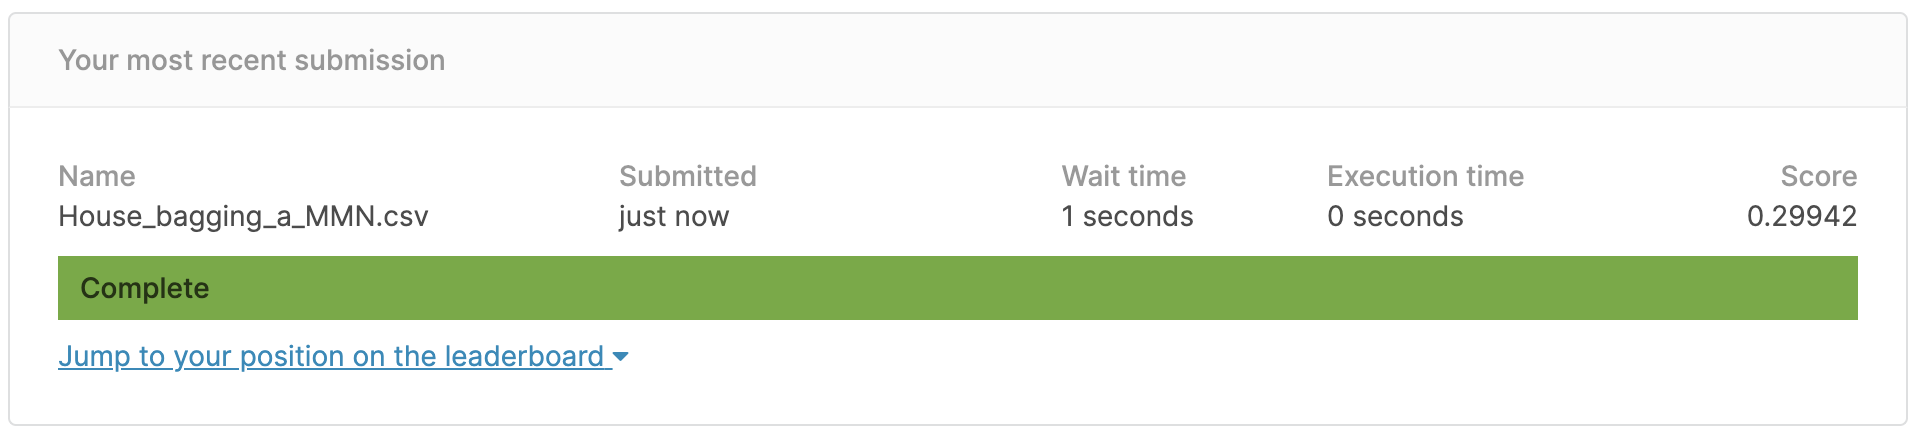

In [215]:
# do cross validation the show the mean of score
Pip_bagging_a = cross_val_score(bagging_pipe_gridsearch_a, X_train_a, y_train_a, cv=5, n_jobs=1)
print("{} {} Score:\t{:0.3} ".format("bagging", "Train", Pip_bagging_a.mean().round(3)))

Ridge Train Score:	0.485 


#### 3- Extra Tree

In [236]:
#define the parameter of model[EXtra tree]
et_params_a = {
    'n_estimators': [100, 150, 200],
    'max_features':[5, 7, 8],
    'max_depth': [1, 2, 3, 4, 5, 8],
    'bootstrap':[True, False]
}


In [237]:
et_g_a = ExtraTreesRegressor()#define the model

In [238]:
# What is the model we want to fit?
# What is the dictionary of hyperparameters?
 # What number of folds in CV will we use? 
et__gridsearch_a = GridSearchCV(et_g_a,et_params_a, cv=5, verbose = 1)
et__gridsearch_a.fit(X_train_a, y_train_a)
et__gridsearch_a.get_params()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': False,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': ExtraTreesRegressor(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [100, 150, 200],
  'max_features': [5, 7, 8],
  'max_depth': [1, 2, 3, 4, 5, 8],
  'bootstrap': [True, False]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

In [239]:
print('The best score' ,et__gridsearch_a.best_score_)# show the best score
print('The score after GridSearch',et__gridsearch_a.score(X_train_a, y_train_a))#show the score of X,y train_a
print(f'the best parameters :{et__gridsearch_a.best_params_}')# show the best parameter that used in fit model

The best score 0.7542056371584728
The score after GridSearch 0.8505544027148592
the best parameters :{'bootstrap': False, 'max_depth': 8, 'max_features': 8, 'n_estimators': 200}


In [240]:
#prediction for the best model in pred_et_best on Train data
trainpredect_et_a=et__gridsearch_a.predict(X_train_a)
#prediction for the best model in pred_et_best on Test data
testpred_et_a= et__gridsearch_a.predict(X_test_a)

In [241]:
print(np.sqrt(mean_squared_error(y_train_a, trainpredect_et_a)))# print MSE score

30700.51770066157


In [242]:
print(metrics.mean_squared_error(y_train,trainpredect_et_a))#print MMSE score

942521787.0886344


In [224]:
# create dataframe that contains ID and testpred
et_df_a=pd.DataFrame(testpred_et_a,test_data['Id']).reset_index()
et_df_a.rename(columns={0:'SalePrice'}, inplace=True)
et_df_a.head()# show the head of dataframe

Id      SalePrice
0  1461  134193.465072
1  1462  153620.139940
2  1463  189010.743307
3  1464  204773.710697
4  1465  197438.316678

In [225]:
et_df_a.to_csv('./datasets/House_ETree_a_MMN.csv',index=False)# save the dataframe in CSV file to send it to kaggle

This is the score that we got from Kaggle in Extra Tree model with all
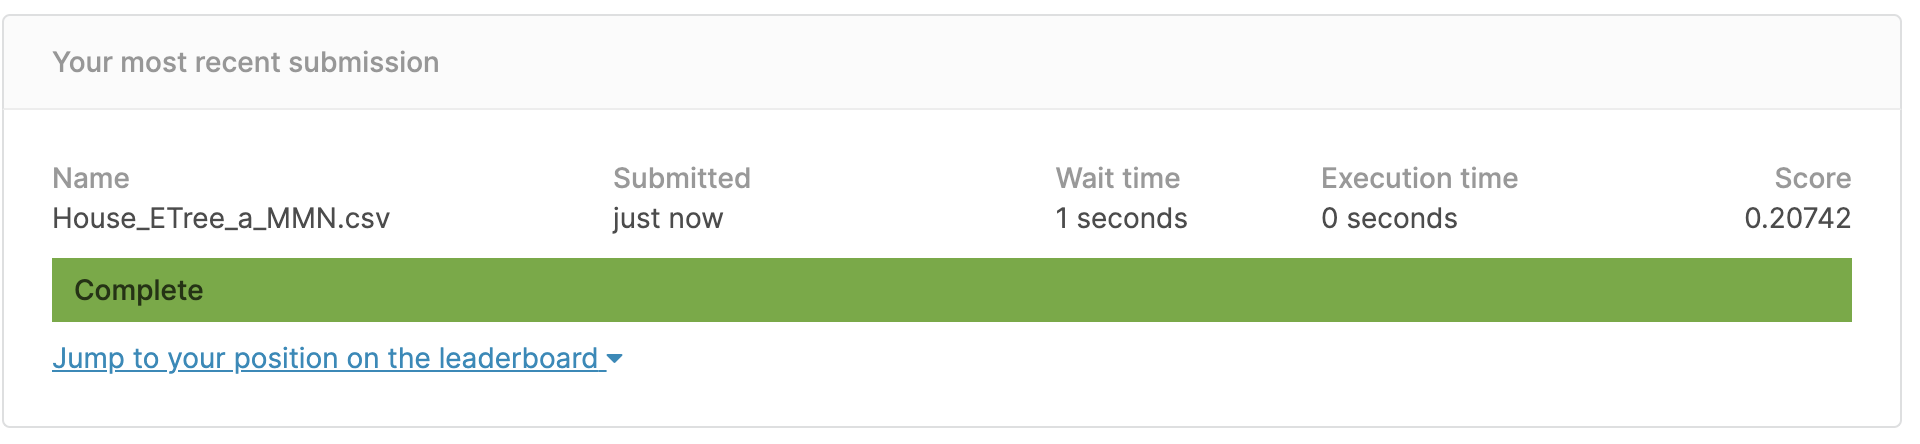

In [245]:
# do cross validition and show the mean of scores
Pip_Etree_a= cross_val_score(et__gridsearch_a, X_train_a, y_train_a, cv=5, n_jobs=1)
print("{} {} Score:\t{:0.3} ".format("ExtraTree", "Train", Pip_Etree_a.mean().round(3)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
ExtraTree Train Score:	0.745 


------

## Results

#### 1-Results in frist strategy [using nemoric features]
###### Using scale and Grid_search
In this method we use several model named [Linear_regression, Ridge_regressor, Lasso_regressor, Random_Forest, Extra_trees,
Knn_regression, Decision_tree, Bagging_regressor]
The best result was in Random_Forest and the worth result was in Decision_tree.
###### Without using scale and Grid_search
In this method we tried to take the model with highest and lowest scores in the previous method and other models 
we used models named [Decision_tree,Random_Forest,AdaBoost,GradientBoosting]
The best result was in Random_Forest and the worth result was in Decision_tree.
From this result might be say the random_forest model is much better than decision_tree, but we can not apply this result for all data.

#### 2-Results in second strategy [using corrolation features]
In this method we use several model named [Random_Forest, Extra_trees, Bagging_regressor]
We tries to use this model without scale and Gid_search as we did in the frist stategy but we got very bad score in the frist trying in Random_Forest, then we decied to go with scaling and Grid_search the models
the best score was in Extra_Tree model and the worth score was in Bagging model.


#### 3-Results in Third strategy [using all features]
In this method we use several model named [Random_Forest, Extra_trees, Bagging_regressor] we do not want loos the time so, we go directly to apply scaling and Grid_search
the best score was in Random_Forest model and the worth score was in Bagging model.


#### Conclusion:
To abstract all above we design the table that show the best score for each stategy with the model name

In [130]:
# we did a dataframe named 'model_df' that conclude the result of each model to make easy comparing between them
model_Table = {'Startegy':  ['Nemoric_Features', 'Correlation_Features',# model names
                          'All_Features'],
               'Model_Name': ['Random_Forest[without scale&Grid_search]', 'ExtraTrees',# model names
                          'RandomForest'],
               'Train_Score': [0.974, 0.824,0.817],
               'Test_Score': [0.1696, 0.1734,0.1825],
               'Train_Cross_Validation_Score': [0.833, 0.822 ,0.812]
               }

model_df = pd.DataFrame (model_Table, columns = ['Startegy','Model_Name','Train_Score','Test_Score','Train_Cross_Validation_Score'])

model_df.head(6)
#print(model_df)

Startegy                                Model_Name  \
0      Nemoric_Features  Random_Forest[without scale&Grid_search]   
1  Correlation_Features                                ExtraTrees   
2          All_Features                              RandomForest   

   Train_Score  Test_Score  Train_Cross_Validation_Score  
0        0.974      0.1696                         0.833  
1        0.824      0.1734                         0.822  
2        0.817      0.1825                         0.812

So, the best score we got in using the nemoric features strategy without scale and Grid_search in Random_forest model.